# Cars4U - Price predictions on used cars

## Objective 

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

To preprocess the raw data, analyze it, and build a linear regression model to predict the price of used cars.

## Key Questions

* What are the key factors influencing the price of an used car?
* Is there a good predictive model for the determine price of an used car? 
* What does the performance assessment look like for such a model?


## Data Description
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

Each record in the dataset provides a description of an car and its price. Some cars will have current price if that car was bought new. 

### Data Dictionary

Attribute Information (in order):

* S.No.: Serial number
* Name: Name of the car which includes brand name and model name
* Location: Location in which the car is being sold or is available for purchase (cities)
* Year: Manufacturing year of the car
* Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
* Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
* Transmission: The type of transmission used by the car (Automatic/Manual)
* Owner: Type of ownership
* Mileage: The standard mileage offered by the car company in kmpl or km/kg
* Engine: The displacement volume of the engine in CC
* Power: The maximum power of the engine in bhp
* Seats: The number of seats in the car
* New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
* Price: The price of the used car in INR Lakhs

## Flow & Approach

In order to understand the data from cars4u and provide a model that predicts prices of used cars, business recomendations we are going to do below steps 

* Import Data 
* Review Data, Features, Car Models and Year and other features related to car 
* inital eda to explore how data related to each other and figure out outliers
* Data Preprocessing - Process data and fix data
* explore new features, add new columns - Feature Engineering
* fix outliers, nan values - Outlier Treatment 
* convert columns to category or number based on data type - Column Conversions
* create bucket bins based on data type - Feature Engineering
* delete nan values which cannot be fixed
* Do Univariate & Bivariate analysis on different features and under feature relationsip
* Understand how each featueres are realted and each feature related to price 
* Create Training & Test, Drop Columns if its not going to impact price predictions 
* Build Linear Model(s), Build Multiple Models & Compare performance & errors
* Conclusion



### Import necessary python libraries

* import numpy and pandas to load and process data 
* import seaborn, matplotlib for data visualization
* import sklearn and sub packages to build a linear model
* set data visualization theme, how to display decimal numbers, warning settings
* set a common random seed setting to get same data on every run


In [1]:
# Format Python code structure
%load_ext nb_black

# Numpy & Pandas to import, process & understand data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# setting graph plots background style as darkgrid
sns.set_theme(style="darkgrid")
# to generate graphs/plots inline in jupyter notebook
%matplotlib inline
# to round numerical columns to 3 digit decimal
pd.set_option("display.float_format", lambda x: "%.3f" % x)


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)

# Turning off the warning SettingWithCopyWarning
pd.set_option("mode.chained_assignment", None)

<IPython.core.display.Javascript object>

# Loading and exploring the data

In this section the goals is to load the data and then to check its properties, size, data types.


### Read Data from csv file and load data into a panda dataframe 
* file name - used_cars_data.csv
* 1st column S.No. will be used as index column
* dataframe attribute name data - original data, df (copy) used for processing

<b>reading csv file and load data to data frame</b>

In [2]:
# data frame names
df=None
data=None
#file name 
inputFileName="used_cars_data.csv"
try:
     data = pd.read_csv(inputFileName, index_col="S.No.")
except FileNotFoundError as err:
    print(f'Error : cannot import file : {inputFileName}, Error : {err.args[1]} ')
finally:
    if not isinstance(data,pd.core.frame.DataFrame):
        print(f'Cannot proceed further, Dataframe is null'); 
        #dont want to stop the process in notebook, ideally next steps would not proceed.
    else:
        print(f'input file : {inputFileName} data imported.');
        df = data.copy()


input file : used_cars_data.csv data imported.


<IPython.core.display.Javascript object>

### Common Methods on DataFrame

lets create common methods that we use multiple time during intial process and while data preprocessing 

* shape (total rows/columns)
* print data types
* print null/nan data counts
* print top 10 category column values & its count



In [3]:
# building common methods that we will use multiple times to check data and during data pre processing 

def data_shape(df):
    """
    Prints total rows and columns in input data frame
    """
    print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")


def print_data_types(df):
    """
    Prints data types, and non null count for all columns in input data frame
    """
    print("\nData Type of each column\n")
    print(df.info())


def print_null_info(df):
    """
    Prints total null value count(s) for all columns in input data frame
    """
    print("\nTotal Null value counts\n")
    print(df.isnull().sum().sort_values(ascending=False))


def print_category_value_counts(df, column_names):
    """
    Prints unique value counts, top 10 value & count(s) for all category columns in input data frame
    """
    print()
    for typeval, col in zip(df[column_names].dtypes, df[column_names]):
            print()
            print(f"Column name : {col} has total {df[col].nunique()} unique values")
            print()
            print(df[col].value_counts()[0:10])
            print()
            print("-" * 50)


<IPython.core.display.Javascript object>

## Checking Data 
**Check the fews rows of cars data, and check out its info() and describe() methods.**


check random 10 rows how data looks

In [4]:
df.sample(n=10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.000,9.47 Lakh,6.000
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.000,5.44 Lakh,4.110
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.000,NaN,6.000
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.000,NaN,35.280
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.000,NaN,6.340
599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.000,28.05 Lakh,24.820
186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.000,NaN,32.000
305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.000,NaN,20.770
4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.000,NaN,2.500


<IPython.core.display.Javascript object>

### Data Shape
How many rows and columns in input data?

In [5]:
# check data shape, total rows and columns

data_shape(df)

There are 7253 rows and 13 columns.


<IPython.core.display.Javascript object>

### observations
* total 7253 rows and 13 columns in input csv file

### Check Data Types

lets check all data types and non null value counts 

In [6]:
# check all data types and not null counts
print_data_types(df)


Data Type of each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB
None


<IPython.core.display.Javascript object>

### observations
* Year, Kilometers_Driven, Seats & Price are numerical columns 
* Location, Fuel_Type, Transmission, Owner_Type are all catergory type columns
* Mileage, Engine, Power, New_price are columns that can be converted to numerical type in data pre processing steps
* name column is name of the car, lets check if we can keep this column or drop in data pre processing steps
* few columns has missing values, we can fill those value or drop when doing pre processing

### using describe check numerical column stats

In [7]:
# describe shows summary for all numerical columns, its min, max, mean, 25th,50th and 75th% percentile, st deviation,
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.000,2013.365,3.254,1996.000,2011.000,2014.000,2016.000,2019.000
Kilometers_Driven,7253.000,58699.063,84427.721,171.000,34000.000,53416.000,73000.000,6500000.000
Seats,7200.000,5.280,0.812,0.000,5.000,5.000,5.000,10.000
Price,6019.000,9.479,11.188,0.440,3.500,5.640,9.950,160.000


<IPython.core.display.Javascript object>

### observation on describe

* price column mean values, max and min vary a lot, we should check for data skewness and possible outliers, missing values needs to be treated.
* looks like most of the cars are 5 seaters,  missing values needs to be treated.
* Kilometers_Driven 25, 50 and 75% are showing gradual growth, looks like max value seem to be a outlier. lets check and treat this during preprocessing step. we should check for data skewness 
* Year values spead from 1996 to 2019. Evenly spread accorss most years.



### Checking Null Counts 

lets check which columns has some null values, how many null values

In [8]:
# check how many null values in each columns
print_null_info(df)


Total Null value counts

New_Price            6247
Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64


<IPython.core.display.Javascript object>

### observations
* Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission & Owner_Type does not have any null values 
* New_Price has 6247 null column values, lets see how to fill this column in data pre processing step 
* Price has 1234 null column values, lets see how to fill this column in data pre processing step 
* power(175), seats(53), engine(46) and Mileage(2) has few missing values, we can treat thse in preprocessing step.

###  Check for Duplicates 
lets check for any duplicate values

In [9]:
# check for any duplciate data
df[df.duplicated()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
6582,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.000,NaN,NaN


<IPython.core.display.Javascript object>

### observations
* Only one duplicate record, Same car name, location, and other data - lets see if we can drop this in data preprocessing step

### Top column values & observations
lets check how category column values count and top 10 values for each column 

**checking values for Name, year, location, fuel type, transmission type, owner types**

In [10]:
# print value types and value counts
print_category_value_counts(df, ["Name", "Year"])



Column name : Name has total 2041 unique values

Mahindra XUV500 W8 2WD        55
Maruti Swift VDI              49
Maruti Swift Dzire VDI        42
Honda City 1.5 S MT           39
Maruti Swift VDI BSIV         37
Maruti Ritz VDi               35
Toyota Fortuner 3.0 Diesel    35
Honda City 1.5 V MT           32
Hyundai Grand i10 Sportz      32
Honda Amaze S i-Dtech         32
Name: Name, dtype: int64

--------------------------------------------------

Column name : Year has total 23 unique values

2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
Name: Year, dtype: int64

--------------------------------------------------


<IPython.core.display.Javascript object>

In [11]:
# print value types and value counts
print_category_value_counts(df, ["Location", "Fuel_Type"])



Column name : Location has total 11 unique values

Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Name: Location, dtype: int64

--------------------------------------------------

Column name : Fuel_Type has total 5 unique values

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

--------------------------------------------------


<IPython.core.display.Javascript object>

In [12]:
# print value types and value counts
print_category_value_counts(df, ["Transmission", "Owner_Type"])



Column name : Transmission has total 2 unique values

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64

--------------------------------------------------

Column name : Owner_Type has total 4 unique values

First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64

--------------------------------------------------


<IPython.core.display.Javascript object>

### observations
* Name column name of car is has total 2041 cars, top values are listed above
* Mahindra XUV500 W8 2WD is most sold car 
* Most year has good amount of used cars, 2014,2015, 2016 has most of the cars
* Location - there are 11 locations, This locations can influence price we can convert this location to feature in later steps
* Mumbai location sold most cars followed by Hyderabad
* Fuel Type - has 5 values most of car are diesel and petrol and few other fuel type(very low count) 
* Transmission - only 2 possible values automatic or Manual, Most of the cars sold are Manual type 
* Owner Type - 4 different values - most of the used cars are first owner type and some sencond onwer type, very few third and Fourth types 


In [13]:
# print value types and value counts
print_category_value_counts(df, ["Year", "Engine", "Power"])



Column name : Year has total 23 unique values

2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
Name: Year, dtype: int64

--------------------------------------------------

Column name : Engine has total 150 unique values

1197 CC    732
1248 CC    610
1498 CC    370
998 CC     309
1198 CC    281
2179 CC    278
1497 CC    273
1968 CC    266
1995 CC    212
1461 CC    188
Name: Engine, dtype: int64

--------------------------------------------------

Column name : Power has total 385 unique values

74 bhp       280
98.6 bhp     166
73.9 bhp     152
140 bhp      142
78.9 bhp     128
67.1 bhp     126
67.04 bhp    125
82 bhp       124
88.5 bhp     120
118 bhp      111
Name: Power, dtype: int64

--------------------------------------------------


<IPython.core.display.Javascript object>

In [14]:
df["Seats"].value_counts()

5.000     6047
7.000      796
8.000      170
4.000      119
6.000       38
2.000       18
10.000       8
9.000        3
0.000        1
Name: Seats, dtype: int64

<IPython.core.display.Javascript object>

### observations
* Year - Range from 2009 to 2015 - most of the car sold are 2015 made 
* Seats - Most of the cars sold are 5 seater, followed by 7 and 8 seaters 
* most of the cars of engine type - 1197 CC  , these can be coverted to numerical column in preprocessing step
* power of 74 bhp is top power, these can be coverted to numerical column in preprocessing step

# Data preprocessing with Exploratory Data Analysis & Insights

Before data visualization lets fix the data 

## Processing columns - Column Conversions

###  Make columns category type

* Location
* Fuel_Type
* Transmission
* Owner_Type

**Let's explore the data!**

### check data types for possible column type conversions

In [15]:
# checking data types
print_data_types(df)


Data Type of each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB
None


<IPython.core.display.Javascript object>

### possible category columns, save memory usage

* Location, Fuel_Type, Transmission, Owner_Type - we already checked top values on these columns and columns should be treated as category columns 

In [16]:
# create a list those columns should be converted as category
cat_vars = ["Location", "Fuel_Type", "Transmission", "Owner_Type"]

for colname in cat_vars:
    df[colname] = df[colname].astype("category")

print_data_types(df)




Data Type of each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   object  
 8   Engine             7207 non-null   object  
 9   Power              7078 non-null   object  
 10  Seats              7200 non-null   float64 
 11  New_Price          1006 non-null   object  
 12  Price              6019 non-null   float64 
dtypes: category(4), float64(2), int64(2), object(5)
memory usage: 595.9+ KB
None


<IPython.core.display.Javascript object>

### observations 

* Location, Fuel_Type, Transmission, Owner_Type Columns converted as category columns. 
* Memory saving - inital memory usage before coversion is memory usage: 793.3+ KB, After conversion memory usage: 595.9+ KB. 

## Processing columns - Data Coversions
### Convert to numerical type columns 

* Mileage
   * Remove km/kg and kmpl from data since both the units refer to the distance covered (in km) per unit of fuel.
* Engine
    * can drop CC from engline(like 998 CC to just 998) 
* Power
    * can drop bhp from power(58.16 bhp to just 58.16) 

In [17]:
# strip kmpl and km/kg values from Mileage column
df["Mileage"] = df["Mileage"].str.rstrip(" kmpl")
df["Mileage"] = df["Mileage"].str.rstrip(" km/g")

# strip CC value from engine
df["Engine"] = df["Engine"].str.rstrip(" CC")

# strip bhp value from power
df["Power"] = df["Power"].str.rstrip(" bhp")

# create a list those columns should be converted as float
num_vars = ["Mileage", "Engine", "Power"]

for colname in num_vars:
    df[colname] = df[colname].astype("float64")


print_data_types(df)


Data Type of each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7200 non-null   float64 
 11  New_Price          1006 non-null   object  
 12  Price              6019 non-null   float64 
dtypes: category(4), float64(5), int64(2), object(2)
memory usage: 595.9+ KB
None


<IPython.core.display.Javascript object>

### observations 

* Power, Engine, Mileage Columns converted as numeric float columns. Now these values can be analysed for skewness and outliers. 

### Convert Price and New Price columns 

* currently price column has value in INR Lakhs 
* new price column has value represent in string, lets convert that to INR lakhs
* convert cr values to lakhs



In [18]:
# writing a method to convert price in string to number
def price_to_num(price_val):
    """This function takes in a string representing a price in INR
    and converts it to a number. For example, '9.47 Lakh' becomes 9.47.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(price_val, str):  # checks if `price_val` is a string
        multiplier = 1  # handles Lakh vs Cr salaries
        if price_val.endswith("Lakh"):
            multiplier = 1
        elif price_val.endswith("Cr"):
            multiplier = 100
        return float((price_val.replace("Lakh", "").replace("Cr", ""))) * multiplier
    else:  # this happens when the current income is np.nan
        return np.nan


df["New_Price"] = df["New_Price"].apply(price_to_num)

<IPython.core.display.Javascript object>

In [19]:
# lets check how data looks after concversion
df.sample(n=10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
2245,Maruti Wagon R VXI 1.2,Mumbai,2015,55000,Petrol,Manual,First,21.500,1197.000,81.800,5.000,5.880,3.100
6407,Maruti Swift LXI Option,Kochi,2017,62889,Petrol,Manual,First,20.400,1197.000,81.800,5.000,NaN,NaN
1226,Toyota Corolla Altis 1.8 VL CVT,Delhi,2017,21000,Petrol,Automatic,First,14.280,1798.000,138.030,5.000,23.250,18.000
533,Honda City 1.5 V AT,Mumbai,2010,69000,Petrol,Automatic,Second,16.800,1497.000,118.000,5.000,NaN,2.850
6330,Hyundai i20 Asta 1.2,Kolkata,2015,33000,Petrol,Manual,First,18.600,1197.000,81.830,5.000,NaN,NaN
5931,Maruti Ertiga VXI,Mumbai,2012,52500,Petrol,Manual,Second,16.020,1373.000,93.700,7.000,NaN,5.250
2784,Nissan Micra Diesel XV,Hyderabad,2011,86732,Diesel,Manual,First,23.080,1461.000,63.100,5.000,NaN,3.600
5180,Skoda Superb Elegance 1.8 TSI AT,Bangalore,2009,75000,Petrol,Automatic,Second,13.700,1798.000,157.750,5.000,NaN,4.950
2722,Volkswagen Ameo 1.5 TDI Highline,Kochi,2018,31426,Diesel,Manual,First,21.660,1498.000,108.620,5.000,9.720,7.900


<IPython.core.display.Javascript object>

In [20]:
# check for data tyes
print_data_types(df)


Data Type of each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7200 non-null   float64 
 11  New_Price          1006 non-null   float64 
 12  Price              6019 non-null   float64 
dtypes: category(4), float64(6), int64(2), object(1)
memory usage: 595.9+ KB
None


<IPython.core.display.Javascript object>


### observations

* new price column has been converted to number,
* cr values has been converted to lakhs values
* new_price and price are in same data type and comparable

##  Feature Engineering - Make new Features 
### Extract Make & Model from Name 

From Name column we can determine the Model and Make 
* eg - Maruti Ciaz 1.4 Zeta - can be split into Make: Maruti, Model: Ciaz 1.4 Zeta
* most car price are decided by brand(make) values. This will be a important feature to predict the prices.


In [21]:
# Extract Make and Model From Name.

model_data = pd.DataFrame(
    data=[
        (i, i.split()[0].title(), " ".join(i.split()[1:])) if i == i else (i, "", "")
        for i in df["Name"].str.strip().str.title()
    ],
    columns=["Name", "Make", "Model"],
)


# add new columns to existing data frame

df["Make"] = model_data["Make"]
df["Model"] = model_data["Model"]

# make Make and Model as catrory column

df["Make"] = df["Make"].astype("category")
df["Model"] = df["Model"].astype("category")

<IPython.core.display.Javascript object>

In [22]:
# print value types and value counts
print_category_value_counts(model_data, ["Make", "Model"])



Column name : Make has total 32 unique values

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
Bmw               312
Audi              285
Name: Make, dtype: int64

--------------------------------------------------

Column name : Model has total 2017 unique values

Swift Dzire Vdi        62
Xuv500 W8 2Wd          55
Swift Vdi              49
City 1.5 S Mt          39
Swift Vdi Bsiv         37
Swift Dzire Vxi        37
Ritz Vdi               35
Fortuner 3.0 Diesel    35
Alto Lxi               34
City 1.5 V Mt          32
Name: Model, dtype: int64

--------------------------------------------------


<IPython.core.display.Javascript object>

### observations

* Maruti and Hyundai are the most sold used cars, Followed by Honda and Toyota 
* New Make coloum is categoru type and can be used as a feature to predict the price of used cars.
* models converted as category column

### Determine Age of Car using Year

lets determine age of the used car using current year - Car Made year 

this will be a useful feature column to predict the price 

In [23]:
df["Age_Of_Car"] = 2021 - df["Year"]

<IPython.core.display.Javascript object>

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.000,2013.365,3.254,1996.000,2011.000,2014.000,2016.000,2019.000
Kilometers_Driven,7253.000,58699.063,84427.721,171.000,34000.000,53416.000,73000.000,6500000.000
Mileage,7251.000,18.142,4.562,0.000,15.170,18.160,21.100,33.540
Engine,7207.000,1616.573,595.285,72.000,1198.000,1493.000,1968.000,5998.000
Power,7078.000,112.765,53.494,34.200,75.000,94.000,138.100,616.000
Seats,7200.000,5.280,0.812,0.000,5.000,5.000,5.000,10.000
New_Price,1006.000,22.780,27.759,3.910,7.885,11.570,26.043,375.000
Price,6019.000,9.479,11.188,0.440,3.500,5.640,9.950,160.000
Age_Of_Car,7253.000,7.635,3.254,2.000,5.000,7.000,10.000,25.000


<IPython.core.display.Javascript object>

### observations

* age of car new column added and its numerical tupe. most of the cars are 5 to 10 yrs old, we do have some 25 yrs old car. we can check this data for skewness and possible outliers

### Initial Univariate analysis 

Univariate analysis helps to check data skewness and possible outliers and spread of the data.


In [25]:
## building a Common method to generate graphs


def generate_univariate_chart(data, feature, hue=None, kde=False, bins=20):
    """
    Builds histplot and boxplot for given field.
    Can plot hue, kde and bins based on params, these are optional columns
    """
    sns.set_style("darkgrid")
    print(f"Genrating Charts for feature : {feature}")
    # sns.set_context('poster',font_scale=1)
    # figsize(width,height)

    fig, axes = plt.subplots(2, figsize=(15, 15))
    fig.suptitle("Univariate analysis for " + feature)

    sns.histplot(
        data=data,
        x=feature,
        ax=axes[0],
        palette="winter",
        bins=bins,
        kde=kde,
        hue=hue,
        multiple="dodge",
    )
    sns.boxplot(
        data=data, x=feature, ax=axes[1], showmeans=True, color="violet", hue=hue
    )

<IPython.core.display.Javascript object>



### Check how Price is distributed
Check histogram and boxplot for data spread, skewness and outliers

Genrating Charts for feature : Price


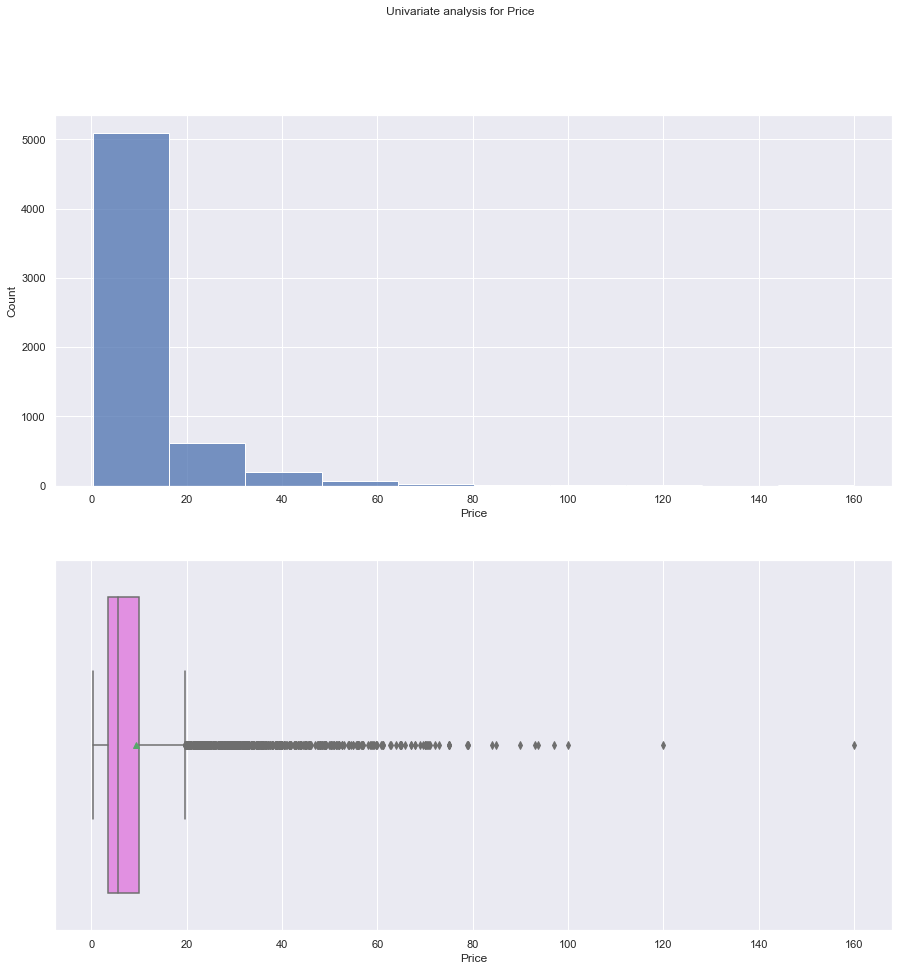

<IPython.core.display.Javascript object>

In [26]:
# with all params
generate_univariate_chart(data=df, feature="Price", hue=None, bins=10, kde=False)

### Observation on Price

* most of the cars available are under 10 lakhs, followed by 20-30 lakhs range. 
* The distribution is heavily right-skewed, and possible outliers beyond 100 lakhs, or they may be luxury brands
* price columns needs log transformantion to distribute the data evenly, and outlier treatment

### Check how New_Price is distributed
Check histogram and boxplot for data spread, skewness and outliers

Genrating Charts for feature : New_Price


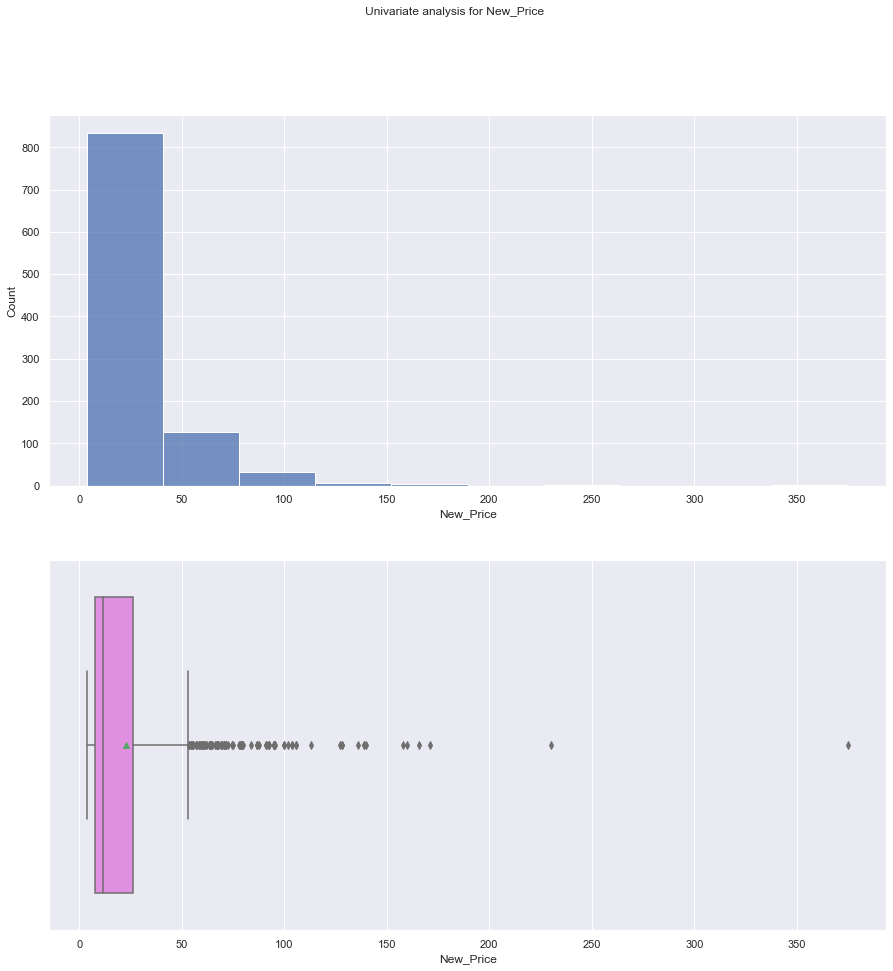

<IPython.core.display.Javascript object>

In [27]:
# with all params
generate_univariate_chart(data=df, feature="New_Price", hue=None, bins=10, kde=False)

### Observation on New_Price

* all the observation on the price are applicable for new_price 
* most of the cars available are under 10-30 lakhs, followed by 50-75 lakhs range. 
* The distribution is heavily right-skewed, and possible outliers beyond 130 lakhs, or they may be luxury brands
* new_price columns needs log transformantion to distribute the data evenly, and outlier treatment

### Check how Kilometers_Driven is distributed
Check histogram and boxplot for data spread, skewness and outliers

Genrating Charts for feature : Kilometers_Driven


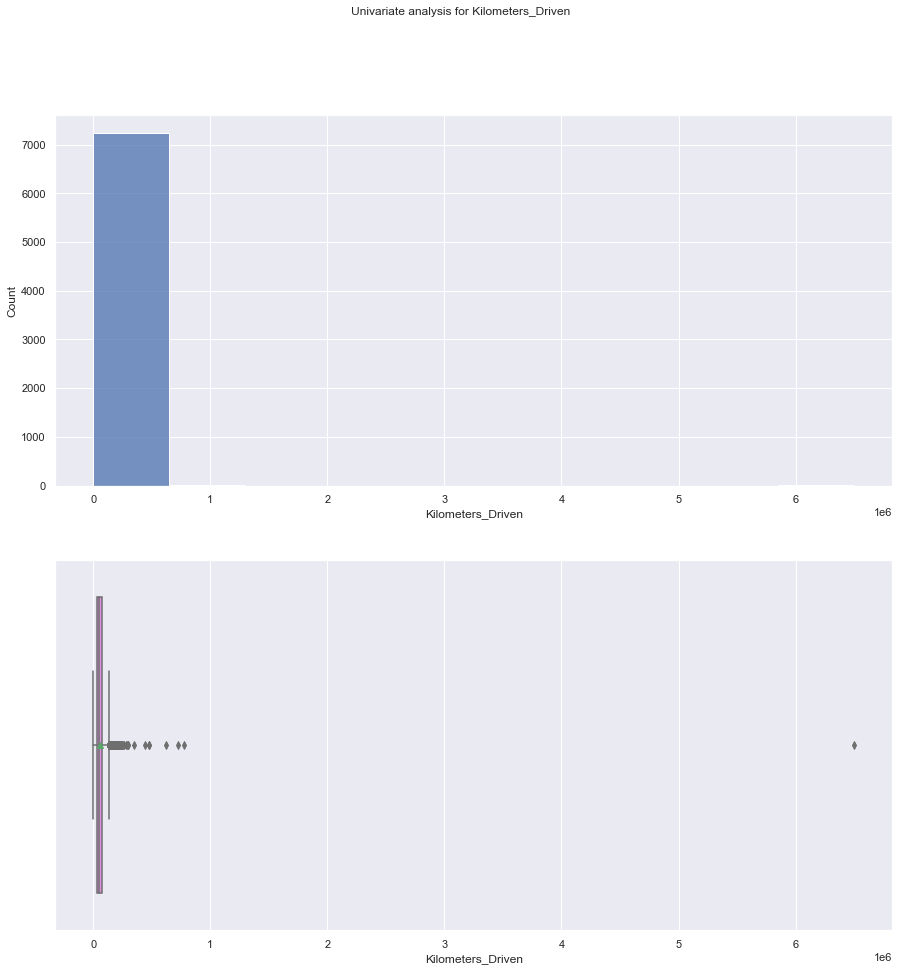

<IPython.core.display.Javascript object>

In [28]:
# with all params
generate_univariate_chart(
    data=df, feature="Kilometers_Driven", hue=None, bins=10, kde=False
)

### Observation on Kilometers_Driven  - And Fix Extreme Outlier

* it has one extreme outlier showing 6.5 million - we should fix this row 

* 75% cars driven around 70K Kms 

*  The distribution is heavily right-skewed, and one possible extreme outliers

* Outlier car car is BMW X5 Xdrive 30D M Sport	4, 4 yrs old so lets fix the value has 65K Kms

In [29]:
df[df["Kilometers_Driven"] >= 6500000].index
df["Kilometers_Driven"][df[df["Kilometers_Driven"] >= 6500000].index] = 65000


<IPython.core.display.Javascript object>

### Check how Kilometers_Driven is distributed - after outlier treatment
Check histogram and boxplot for data spread, skewness and outliers

Genrating Charts for feature : Kilometers_Driven


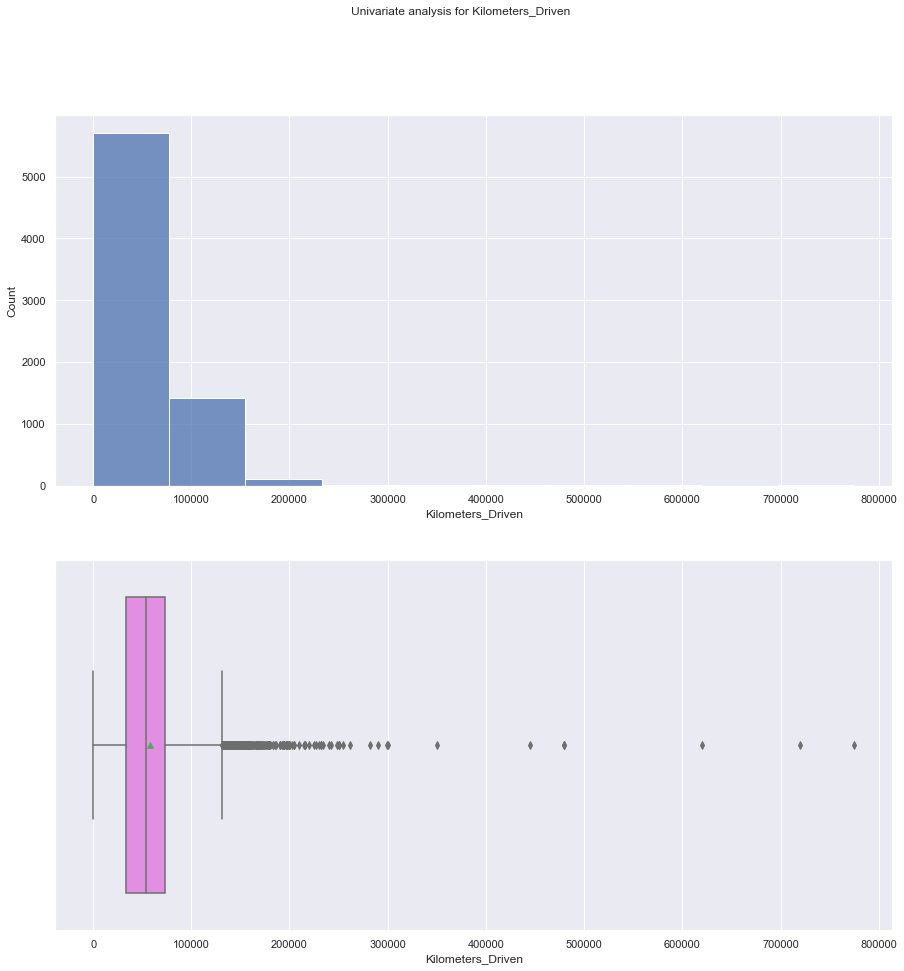

<IPython.core.display.Javascript object>

In [30]:
# with all params
generate_univariate_chart(
    data=df, feature="Kilometers_Driven", hue=None, bins=10, kde=False
)

### Observation on Kilometers_Driven  

* data looks much better after outlier treatment
* 75% cars driven around 70K Kms 
*  The distribution is heavily right-skewed, and one possible extreme outliers

## Missing value Treatment

### Validate Data

lets compare all the columns one by one how many values are missing and decide how to fix those values or drop nan values

### Column & Row level missing data

check on columns level which columns has how many missing values

### check on column level

In [31]:
# check how many null values in each columns
print_null_info(df)



Total Null value counts

New_Price            6247
Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Make                    0
Model                   0
Age_Of_Car              0
dtype: int64


<IPython.core.display.Javascript object>


* New_Price column has most missing values 6247
* Price column also has 1234 missing values
* Power, Seats, Engine and Mileage has few missing values
 
### check on row level

In [32]:
# most rows don't have missing values now
num_missing = df.isnull().sum(axis=1)
num_missing.value_counts()

1    5232
2    1125
0     823
4      36
3      27
5      10
dtype: int64

<IPython.core.display.Javascript object>

### observations 

* 823 rows has no missing values, so we cannot drop all missing value rows because only 12-13% of data has no missing values. We have to figure out a way to get those missing values.

* 5232 rows has one missing value(may be new price)
* 1125 rows has 2 missing values 
* and some low amount rows has 3,4 and 5 

### check by missing count 

lets check and see if we can find a pattern and fix the missing values 





In [33]:
df[num_missing == 4].sample(n=10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make,Model,Age_Of_Car
S.No.,,,,,,,,,,,,,,,,
4011,Fiat Punto 1.3 Emotion,Pune,2011,45271,Diesel,Manual,First,20.300,NaN,NaN,NaN,NaN,2.600,Fiat,Punto 1.3 Emotion,10
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.100,NaN,NaN,NaN,NaN,3.150,Maruti,Swift 1.3 Lxi,10
5185,Maruti Swift 1.3 LXI,Delhi,2012,52000,Petrol,Manual,First,16.100,NaN,NaN,NaN,NaN,3.650,Maruti,Swift 1.3 Lxi,9
2530,BMW 5 Series 520d Sedan,Kochi,2014,64158,Diesel,Automatic,First,18.480,NaN,NaN,NaN,NaN,17.890,Bmw,5 Series 520D Sedan,7
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.000,NaN,NaN,NaN,NaN,40.880,Land,Rover Range Rover Sport 2005 2012 Sport,13
4697,Fiat Punto 1.2 Dynamic,Kochi,2017,17941,Petrol,Manual,First,15.700,NaN,NaN,NaN,NaN,3.930,Fiat,Punto 1.2 Dynamic,4
2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,First,16.100,NaN,NaN,NaN,NaN,4.240,Maruti,Swift 1.3 Vxi,7
4229,Hyundai Santro Xing XG,Bangalore,2005,79000,Petrol,Manual,Second,17.000,NaN,NaN,NaN,NaN,1.650,Hyundai,Santro Xing Xg,16
3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.000,NaN,NaN,NaN,NaN,11.990,Honda,Cr-V At With Sun Roof,8


<IPython.core.display.Javascript object>


### Check Existing Data has values for missing fields

check existing data using name and year and see we can get data for power, engine and seats, missing is consistent accors the columns

## Fix missing values - Missing value Treatment 

### Fix Engine Values

search existing data to find similar modal, make, year car has values, if yes use that value or if not fill with median value

In [34]:


## to find data from exiting
def find_data_for_engine(name, year):
    """
    find data from existing data frame, using input name and year where engine is not null
    """
    idx = np.where((df["Name"] == name) & (df["Year"] == year) & df["Engine"].notna())
    return idx


missing_items = df[df["Engine"].isna()][["Name", "Year"]]

print(f"Missing values before fix : {missing_items.size}")

for ind in missing_items.index:
    missing_name = missing_items["Name"][ind]
    missing_year = missing_items["Year"][ind]
    value_index = find_data_for_engine(missing_name, missing_year)
    if len(value_index[0]) > 0:
        value = df["Engine"][value_index[0][0]]
        df["Engine"][ind] = value

## Fill median values by Year and Make

df["Engine"] = df.groupby(["Year", "Make"])["Engine"].apply(
    lambda x: x.fillna(x.median())
)

## Fill median values by Make

df["Engine"] = df.groupby(["Make"])["Engine"].apply(lambda x: x.fillna(x.median()))

missing_items = df[df["Engine"].isna()][["Name", "Year"]]
print(f"Missing values after fix : {missing_items.size}")


Missing values before fix : 92
Missing values after fix : 0


<IPython.core.display.Javascript object>

### observation 

* engine has 92 missing values, after treatment it has no missing values

### Fix Power Values

search existing data to find similar modal, make, year car has values, if yes use that value or if not fill with median value

In [35]:
## to find data from exiting
def find_data_for_power(name, year):
    """
    find data from existing data frame, using input name and year where power is not null
    """
    idx = np.where((df["Name"] == name) & (df["Year"] == year) & df["Power"].notna())
    return idx


missing_items = df[df["Power"].isna()][["Name", "Year"]]

print(f"Missing values before fix : {missing_items.size}")

for ind in missing_items.index:
    missing_name = missing_items["Name"][ind]
    missing_year = missing_items["Year"][ind]
    value_index = find_data_for_power(missing_name, missing_year)
    if len(value_index[0]) > 0:
        value = df["Power"][value_index[0][0]]
        df["Power"][ind] = value

## Fill median values by Year and Make
df["Power"] = df.groupby(["Year", "Make"])["Power"].apply(
    lambda x: x.fillna(x.median())
)
## Fill median values by Make
df["Power"] = df.groupby(["Make"])["Power"].apply(lambda x: x.fillna(x.median()))

missing_items = df[df["Power"].isna()][["Name", "Year"]]
print(f"Missing values after fix : {missing_items.size}")

Missing values before fix : 350
Missing values after fix : 4


<IPython.core.display.Javascript object>

### observation 

* Power has 350 missing values, after treatment it has 4 missing values


### Fix Seats Values

search existing data to find similar modal, make, year car has values, if yes use that value or if not fill with median value


In [36]:


## to find data from exiting
def find_data_for_seat(name, year):
    """
    find data from existing data frame, using input name and year where power is not null
    """
    idx = np.where((df["Name"] == name) & (df["Year"] == year) & df["Seats"].notna())
    return idx


missing_items = df[df["Seats"].isna()][["Name", "Year"]]

print(f"Missing values before fix : {missing_items.size}")

for ind in missing_items.index:
    missing_name = missing_items["Name"][ind]
    missing_year = missing_items["Year"][ind]
    value_index = find_data_for_seat(missing_name, missing_year)
    if len(value_index[0]) > 0:
        value = df["Seats"][value_index[0][0]]
        df["Seats"][ind] = value

## Fill median values by Year and Make
df["Seats"] = df.groupby(["Year", "Make"])["Seats"].apply(
    lambda x: x.fillna(x.median())
)
## Fill median values by Make
df["Seats"] = df.groupby(["Make"])["Seats"].apply(lambda x: x.fillna(x.median()))

missing_items = df[df["Seats"].isna()][["Name", "Year"]]
print(f"Missing values after fix : {missing_items.size}")


Missing values before fix : 106
Missing values after fix : 0


<IPython.core.display.Javascript object>

### observation 

* Seats has 106 missing values, after treatment it has 0 missing values

### checking missing value counts by columns - after initial treatment


In [37]:
# check how many null values in each columns
print_null_info(df)



Total Null value counts

New_Price            6247
Price                1234
Mileage                 2
Power                   2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Engine                  0
Seats                   0
Make                    0
Model                   0
Age_Of_Car              0
dtype: int64


<IPython.core.display.Javascript object>

### observation.

* we fixed data for power, engine and seats.

* we should focus next on New_Price and Price


## Fix Missing price values

* by looking similar make, model & year find the value from exising and fill missing price 
* fill missing price by make and year median 


In [38]:
#method to find values for missing data from existing data 
def fix_missing_price_value(trycount):
    """
    this functon will try to find price for missing values using existing data 
    """
    missing_items = df[df["Price"].isna()][["Name"]]
    print(f"Missing values before fix : {missing_items.size} on run {trycount}")


    ## Fill median values by Year, Make and Model
    df["Price"] = df.groupby(["Year", "Make", "Model"])["Price"].apply(
        lambda x: x.fillna(x.median())
    )
    ## Fill median values by Year, Make
    df["Price"] = df.groupby(["Year", "Make"])["Price"].apply(
        lambda x: x.fillna(x.median())
    )

    missing_items = df[df["Price"].isna()][["Name"]]
    print(f"Missing values after fix : {missing_items.size} on run {trycount}")
    
for i in range(1,5,1):
    fix_missing_price_value(i)    


Missing values before fix : 1234 on run 1
Missing values after fix : 12 on run 1
Missing values before fix : 12 on run 2
Missing values after fix : 12 on run 2
Missing values before fix : 12 on run 3
Missing values after fix : 12 on run 3
Missing values before fix : 12 on run 4
Missing values after fix : 12 on run 4


<IPython.core.display.Javascript object>

### Observation
* Price has 1234 missing values. After treatment it has only 12 missing values

### Fix new_price 


* by looking similar make, model & year find the value from exising and fill missing new_price 
* fill missing new_price by make and year median 



In [39]:
#method to find values for missing data from existing data 
def fix_missing_new_price_value(trycount):
    """
    this functon will try to find price for missing values using existing data 
    """
    missing_items = df[df["New_Price"].isna()][["Name"]]
    print(f"Missing values after fix : {missing_items.size} on run {trycount}")


    ## Fill median values by Year, Make and Model
    df["New_Price"] = df.groupby(["Year", "Make", "Model"])["New_Price"].apply(
        lambda x: x.fillna(x.median())
    )
    ## Fill median values by Year, Make
    df["New_Price"] = df.groupby(["Year", "Make"])["New_Price"].apply(
        lambda x: x.fillna(x.median())
    )

    ## Fill median values by Make, Model
    df["New_Price"] = df.groupby(["Make", "Model"])["New_Price"].apply(
        lambda x: x.fillna(x.median())
    )


    missing_items = df[df["New_Price"].isna()][["Name"]]
    print(f"Missing values after fix : {missing_items.size} on run {trycount}")

for i in range(1,5,1):
    fix_missing_new_price_value(i)    
   


Missing values after fix : 6247 on run 1
Missing values after fix : 805 on run 1
Missing values after fix : 805 on run 2
Missing values after fix : 266 on run 2
Missing values after fix : 266 on run 3
Missing values after fix : 224 on run 3
Missing values after fix : 224 on run 4
Missing values after fix : 224 on run 4


<IPython.core.display.Javascript object>

### observation

* after multiple round of missing value treatment 
* Price has 6247 missing values, now it has 224 missing values

In [40]:

# check how many null values in each columns
print_null_info(df)




Total Null value counts

New_Price            224
Price                 12
Mileage                2
Power                  2
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Engine                 0
Seats                  0
Make                   0
Model                  0
Age_Of_Car             0
dtype: int64


<IPython.core.display.Javascript object>

# Outlier Treatment  -  Fix Outlier(s)

### Outlier detection using IQR

lets find all outliers on numerical columns 


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7253 non-null   float64 
 9   Power              7251 non-null   float64 
 10  Seats              7253 non-null   float64 
 11  New_Price          7029 non-null   float64 
 12  Price              7241 non-null   float64 
 13  Make               7253 non-null   category
 14  Model              7253 non-null   category
 15  Age_Of_Car         7253 non-null   int64   
dtypes: cat

<IPython.core.display.Javascript object>

In [42]:
# writing a method that can take a column as input and print all the values falling outside the range of Limts of IQR 
def check_outlier_using_IQR(column, limit=10):
    """
    Check Limts * IQR for each values and prints the ones falls outside the range.
    """
    quartiles = np.quantile(df[column][df[column].notnull()], [0.25, 0.75])
    limit_iqr = limit * (quartiles[1] - quartiles[0])
    outlier = df.loc[np.abs(df[column] - df[column].median()) > limit_iqr, column]
    print();
    print(f"Column : {column} Outlier(s) check");
    print(f"Mean : {df[column].mean()}, Median : {df[column].median()}, Min : {df[column].min()}, Max : {df[column].max()}");
    print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, {limit}*IQR = {limit_iqr}, Total Outlier(s) : {outlier.size} \n")
    print(outlier)
    print("-" * 50)




<IPython.core.display.Javascript object>

In [43]:
for colname in df.columns[df.dtypes == "float64"]:  # filter float64 columns
    check_outlier_using_IQR(colname)
for colname in df.columns[df.dtypes == "int64"]:  # filter int64 columns
    check_outlier_using_IQR(colname)


Column : Mileage Outlier(s) check
Mean : 18.14158047165911, Median : 18.16, Min : 0.0, Max : 33.54
Q1 = 15.17, Q3 = 21.1, 10*IQR = 59.30000000000001, Total Outlier(s) : 0 

Series([], Name: Mileage, dtype: float64)
--------------------------------------------------

Column : Engine Outlier(s) check
Mean : 1616.3930787260445, Median : 1493.0, Min : 72.0, Max : 5998.0
Q1 = 1198.0, Q3 = 1968.0, 10*IQR = 7700.0, Total Outlier(s) : 0 

Series([], Name: Engine, dtype: float64)
--------------------------------------------------

Column : Power Outlier(s) check
Mean : 112.40513791201128, Median : 93.7, Min : 34.2, Max : 616.0
Q1 = 75.0, Q3 = 138.03, 10*IQR = 630.3, Total Outlier(s) : 0 

Series([], Name: Power, dtype: float64)
--------------------------------------------------

Column : Seats Outlier(s) check
Mean : 5.278643320005515, Median : 5.0, Min : 0.0, Max : 10.0
Q1 = 5.0, Q3 = 5.0, 10*IQR = 0.0, Total Outlier(s) : 1158 

S.No.
3      7.000
7      8.000
15     7.000
29     7.000
32    

<IPython.core.display.Javascript object>


### observations on outliers

* Mileage has no extreme outliers 
* Engine there are few cars has high Engine values, those are poweful cars so no outliers on engine
* Power - similar to engine, power has no outlier values - some high values those are powerful cars 
* Seats - has no outlier, some cars has 7 and 10 seats those are van type cars
* New_Price has lot of cars falls outside the 10 times limit because those are luxury cars, most of the cars in the data set a economy cars 

* Price has lot of cars falls outside the 10 times limit because those are luxury cars, most of the cars in the data set a economy cars 

* Land Rover Range Rover 3.0 Diesel LWB Vogue, Lamborghini Gallardo Coupe, aguar F Type 5.0 V8 S has high price  - those are valid prices not outluers


* Bentley Flying Spur W12 has new price of 375.000  - looks like valid price, not outlier, since this is only car in this range we can delete this row if needed






# Data Distribution

### Log transformation to fix skewness

* Price,New_Price and Kilometers_Driven are very skewed and will likely behave better on the log scale.





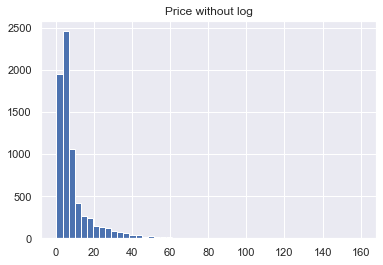

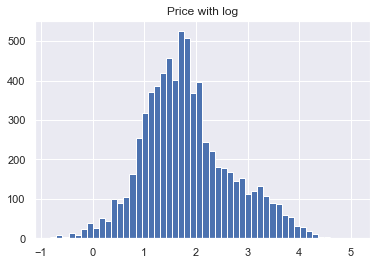

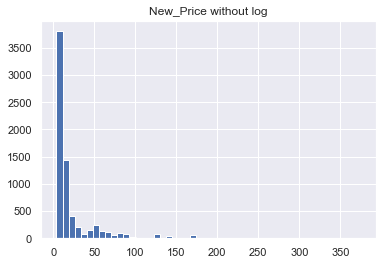

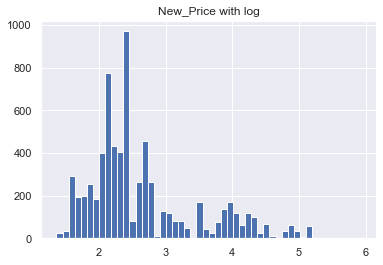

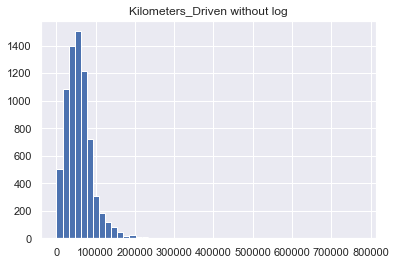

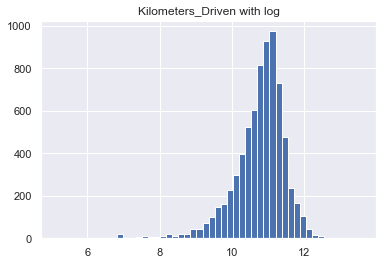

<IPython.core.display.Javascript object>

In [44]:
cols_to_log = ["Price", "New_Price", "Kilometers_Driven"]
for colname in cols_to_log:
    plt.hist(df[colname], bins=50)
    plt.title(colname + " without log")
    plt.show()
    plt.hist(np.log(df[colname]), 50)
    plt.title(colname + " with log")
    plt.show()

## Observation 

Log on Price, New_Price and Kilometer_Driven really helped to distribute data evenly

* we can convert price and New_Price to log values 
* Drop Price and New_Price after conversion



In [45]:
cols_to_log = ["Price", "New_Price", "Kilometers_Driven"]
for colname in cols_to_log:
    df[colname + "_log"] = np.log(df[colname])
df.drop(cols_to_log, axis=1, inplace=True)

<IPython.core.display.Javascript object>

## Check once for any missing values after all treatment(s)

In [46]:
# check how many null values in each columns
print_null_info(df)


Total Null value counts

New_Price_log            224
Price_log                 12
Mileage                    2
Power                      2
Name                       0
Location                   0
Year                       0
Fuel_Type                  0
Transmission               0
Owner_Type                 0
Engine                     0
Seats                      0
Make                       0
Model                      0
Age_Of_Car                 0
Kilometers_Driven_log      0
dtype: int64


<IPython.core.display.Javascript object>

In [47]:
# most rows don't have missing values now
num_missing = df.isnull().sum(axis=1)
num_missing.value_counts()

0    7019
1     229
2       4
3       1
dtype: int64

<IPython.core.display.Javascript object>

### Observations missing data

* after checking on column and row level we still has 224 data missing new_price, 12 data missing price and 2 data missing mileage and power.

* droping these values will not impact much with more than 95% of data has data for all columns

### Drop missing values

delete all missing values 

In [48]:
df.dropna(inplace=True)

<IPython.core.display.Javascript object>

In [49]:
# check how many null values in each columns
print_null_info(df)


Total Null value counts

Name                     0
Location                 0
Year                     0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
Make                     0
Model                    0
Age_Of_Car               0
Price_log                0
New_Price_log            0
Kilometers_Driven_log    0
dtype: int64


<IPython.core.display.Javascript object>

# No missing values 

# Feature Engineering - Price Type 


Creating a price bucket using price range, Since car prices vary a lot and majority of the cars are below 20 lakhs 

lets create bucket called ECONOMY, MID-SCALE and LUXURY



In [50]:
# Price Ranges
df["Price_Type"] = binned_price = pd.cut(
    df["Price_log"],
    [-np.inf, 1.5, 3, np.inf],
    labels=["ECONOMY", "MID-SCALE", "LUXURY"],
)


df.sample(n=30)

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Make,Model,Age_Of_Car,Price_log,New_Price_log,Kilometers_Driven_log,Price_Type
S.No.,,,,,,,,,,,,,,,,,
2213,Maruti Swift VXI,Mumbai,2012,Petrol,Manual,First,18.600,1197.000,85.800,5.000,Maruti,Swift Vxi,9,1.295,1.556,9.616,ECONOMY
681,Volkswagen Polo 1.2 MPI Highline,Pune,2017,Petrol,Manual,Second,16.200,1199.000,74.000,5.000,Volkswagen,Polo 1.2 Mpi Highline,4,1.792,2.421,10.897,MID-SCALE
6811,Honda City i VTEC CVT VX,Hyderabad,2015,Petrol,Automatic,First,18.000,1497.000,117.300,5.000,Honda,City I Vtec Cvt Vx,6,2.110,2.416,10.592,MID-SCALE
401,Mitsubishi Pajero Sport 4X2 AT DualTone BlackTop,Hyderabad,2018,Diesel,Automatic,First,13.500,2477.000,175.560,7.000,Mitsubishi,Pajero Sport 4X2 At Dualtone Blacktop,3,3.332,3.524,9.393,LUXURY
6207,Hyundai Verna CRDi ABS,Chennai,2007,Diesel,Manual,First,18.100,1493.000,110.000,5.000,Hyundai,Verna Crdi Abs,14,0.668,2.644,11.238,ECONOMY
5571,Hyundai i20 Asta 1.2,Bangalore,2014,Petrol,Manual,Second,18.600,1197.000,81.830,5.000,Hyundai,I20 Asta 1.2,7,1.732,2.440,10.343,MID-SCALE
6345,Honda Amaze S i-Vtech,Kolkata,2013,Petrol,Manual,First,18.000,1198.000,86.700,5.000,Honda,Amaze S I-Vtech,8,1.335,2.073,11.159,ECONOMY
4055,Mercedes-Benz E-Class E350 CDI,Delhi,2014,Diesel,Automatic,First,13.000,2987.000,261.500,5.000,Mercedes-Benz,E-Class E350 Cdi,7,3.314,4.366,11.127,LUXURY
2799,Mahindra Scorpio VLX 2.2 mHawk BSIII,Delhi,2010,Diesel,Manual,First,12.050,2179.000,120.000,8.000,Mahindra,Scorpio Vlx 2.2 Mhawk Bsiii,11,1.482,2.411,11.184,ECONOMY


<IPython.core.display.Javascript object>

# Drop unwanted columns 

since Model, Make are made from name and Age made from year - we can drop Name and Year

In [51]:
df.drop(["Name", "Year"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [52]:
df.sample(n=10)

,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Make,Model,Age_Of_Car,Price_log,New_Price_log,Kilometers_Driven_log,Price_Type
S.No.,,,,,,,,,,,,,,,
4921,Mumbai,Petrol,Manual,First,18.600,1197.000,81.830,5.000,Hyundai,I20 Sportz 1.2,5,1.749,2.655,10.086,MID-SCALE
4525,Pune,Diesel,Manual,First,15.100,2179.000,140.000,7.000,Mahindra,Xuv500 W8 2Wd,9,1.975,2.411,11.462,MID-SCALE
4871,Bangalore,Diesel,Manual,Third,13.100,2499.000,141.000,7.000,Ford,Endeavour 2.5L 4X2,10,1.939,2.241,11.170,MID-SCALE
2527,Pune,CNG,Manual,Third,17.000,1086.000,83.000,5.000,Hyundai,Santro Xing Xo Cng,16,0.182,2.498,11.513,ECONOMY
6071,Mumbai,Diesel,Automatic,First,11.400,2953.000,153.860,7.000,Ford,Endeavour 3.0L 4X4 At,11,1.675,2.241,11.562,MID-SCALE
6508,Bangalore,Diesel,Manual,Second,27.620,793.000,47.000,5.000,Maruti,Celerio Zdi,6,1.281,1.770,9.741,ECONOMY
2117,Kochi,Petrol,Automatic,First,21.400,1197.000,83.100,5.000,Maruti,Baleno Delta Automatic,3,2.066,2.323,9.984,MID-SCALE
135,Kochi,Petrol,Automatic,First,17.000,1591.000,121.300,5.000,Hyundai,Verna Vtvt 1.6 At Sx Plus,2,2.442,2.602,9.445,MID-SCALE
4432,Kolkata,Petrol,Manual,First,22.740,796.000,47.300,5.000,Maruti,Alto 800 Vxi,5,0.892,2.149,10.098,ECONOMY


<IPython.core.display.Javascript object>

# Data Preprocessing - Result
**how data looks after all treatments?**

In [53]:
# Let's look at the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mileage,7019.000,18.210,4.512,0.000,15.290,18.250,21.100,33.540
Engine,7019.000,1613.155,581.855,624.000,1198.000,1493.000,1968.000,5461.000
Power,7019.000,112.134,51.449,34.200,75.000,94.000,138.030,503.000
Seats,7019.000,5.279,0.796,0.000,5.000,5.000,5.000,10.000
Age_Of_Car,7019.000,7.532,3.166,2.000,5.000,7.000,9.000,23.000
Price_log,7019.000,1.840,0.849,-0.821,1.267,1.749,2.303,5.075
New_Price_log,7019.000,2.648,0.828,1.364,2.111,2.411,2.959,5.438
Kilometers_Driven_log,7019.000,10.754,0.714,5.142,10.421,10.878,11.193,13.561


<IPython.core.display.Javascript object>

* after data pre processing we can see all the data are evently distributed on all columns 



# Exploratory Data Analysis - post Data pre-processing

# Let's visualize the data to understand better

## Univariate analysis & Bivariate analysis

### Univariate Analysis

lets generate histplot and boxplot for all numeric features and understand how data spread accorss and any outliers

In [54]:
# we have already created common chart method for univariate analysis

<IPython.core.display.Javascript object>

### Price - price_log 



Genrating Charts for feature : Price_log


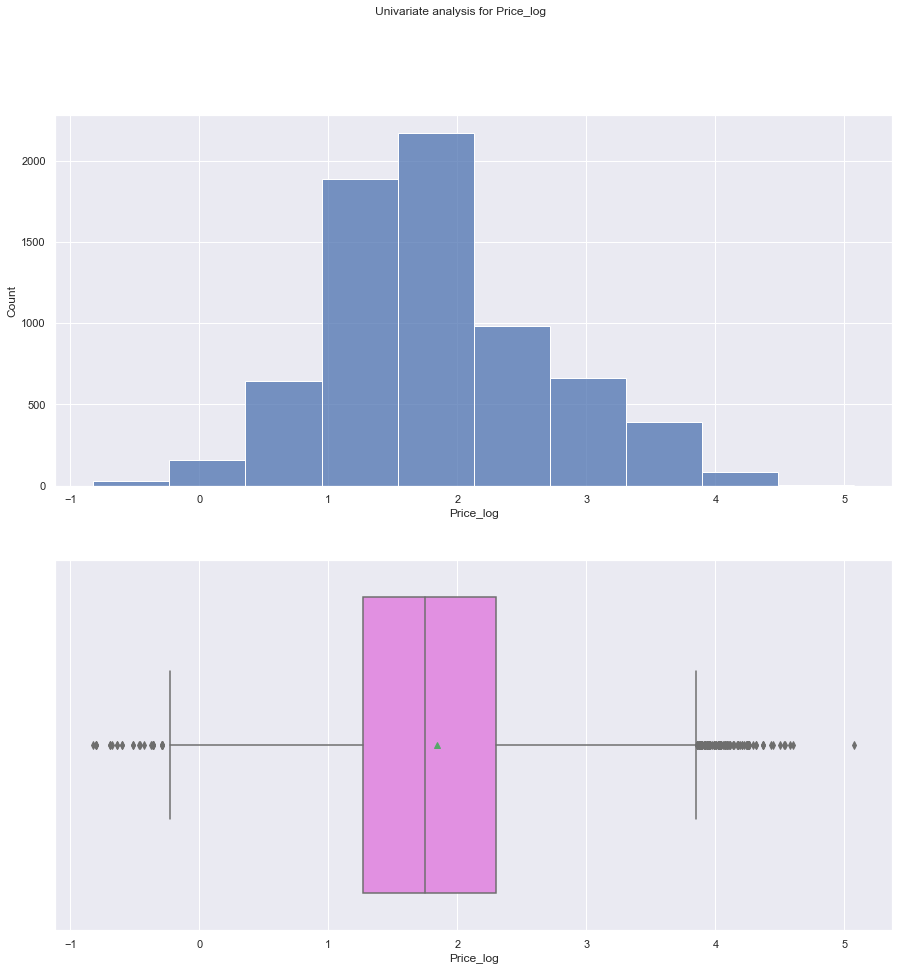

<IPython.core.display.Javascript object>

In [55]:
# generating univariate chart for price column to check data spread and outlier range
generate_univariate_chart(data=df, feature="Price_log", hue=None, bins=10, kde=False)

In [56]:
## Finding mean value - using exp

np.exp(df["Price_log"].mean())

6.295193239506662

<IPython.core.display.Javascript object>

### Observation on Price 

* car prices are distributed accross different log scales, but evenly distributed.
* Price distribution is skewed on both left and right hand side, but those does not seems to be outliers
* mean value of cars are around 6 lakhs

### New Price

Genrating Charts for feature : New_Price_log


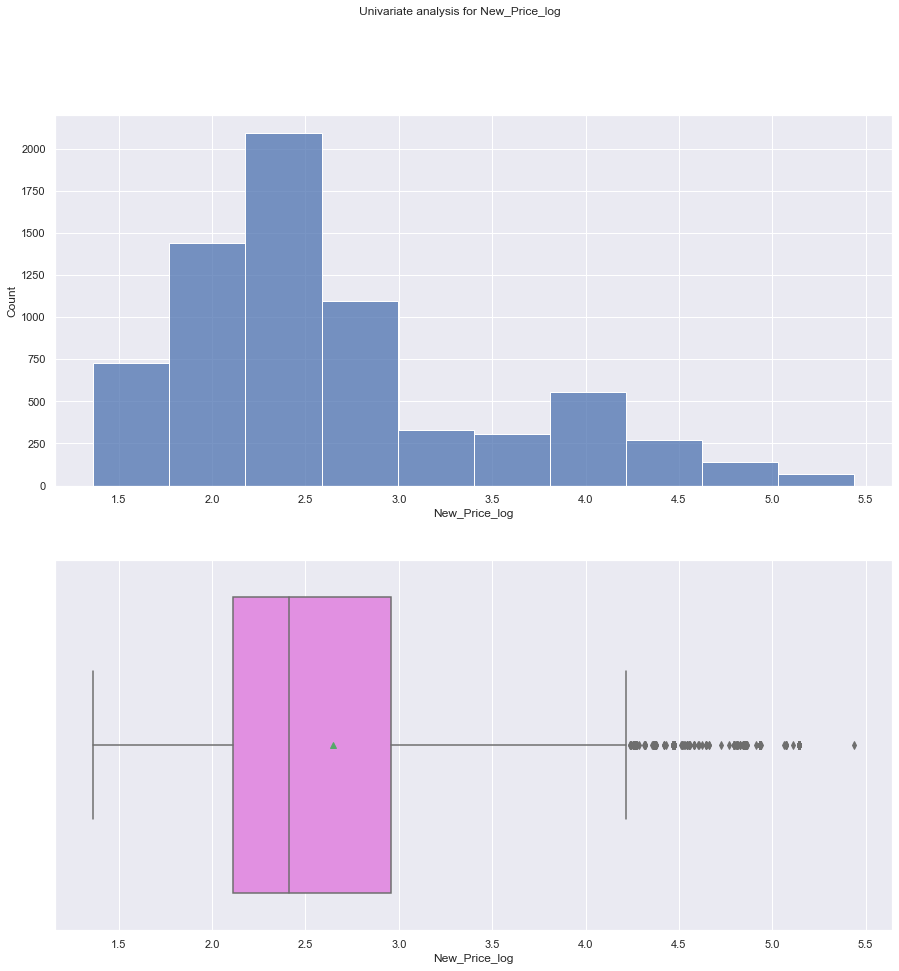

<IPython.core.display.Javascript object>

In [57]:
# generating univariate chart for new price column to check data spread and outlier range
generate_univariate_chart(
    data=df, feature="New_Price_log", hue=None, bins=10, kde=False
)

In [58]:
## EXPanding Log 3 and
print(f"Majority of new price are under {np.exp(3)}")

##outliers
print(f"new price outliers are beyond {np.exp(5)}")

Majority of new price are under 20.085536923187668
new price outliers are beyond 148.4131591025766


<IPython.core.display.Javascript object>

### Observation on New_Price 

* 75% cars are available under 3 log scale, which is 20 lakh
* New_Price distribution is right-skewed 
* has some outliers beyond 150 lakhs, those are valid luxury cars 

### Age of Car (related with Year Column)

Genrating Charts for feature : Age_Of_Car


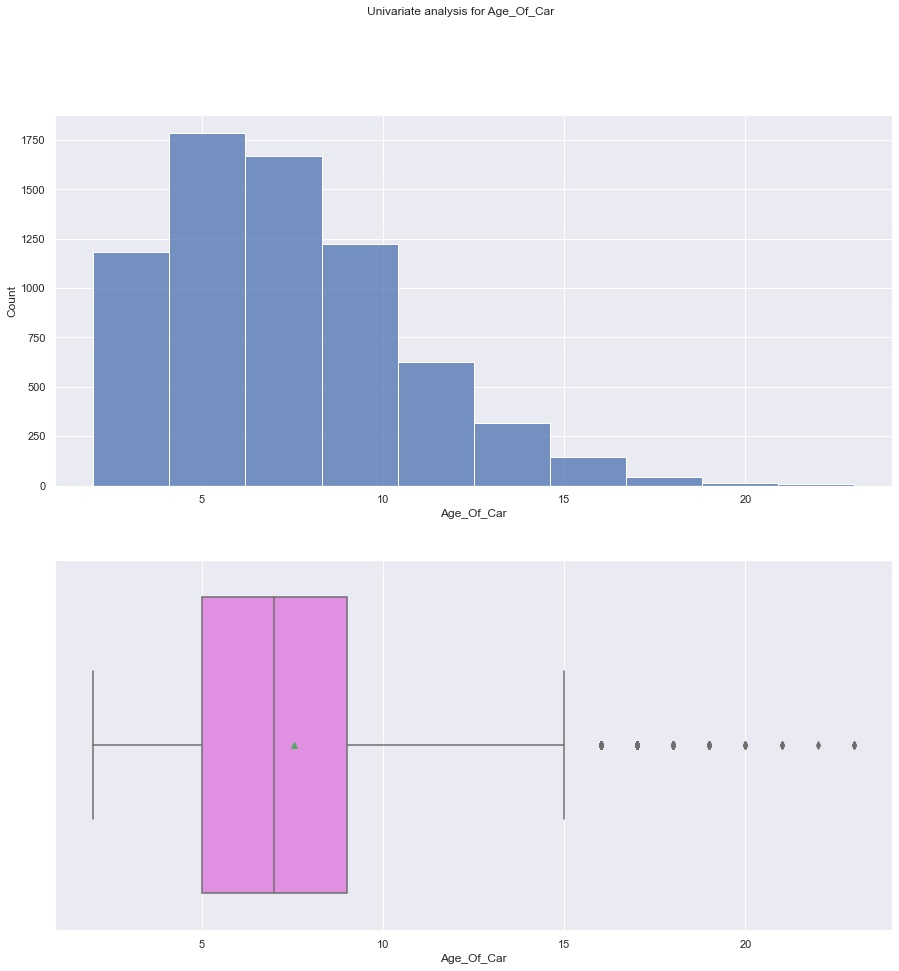

<IPython.core.display.Javascript object>

In [59]:
# generating univariate chart for age of car column to check data spread and outlier range
generate_univariate_chart(data=df, feature="Age_Of_Car", hue=None, bins=10, kde=False)

### Observation on Age_Of_Car 

* 75% cars are under 9 yrs old, mean is around 8 yrs 
* Age is normally distrubuted from 2 to 10 yrs, and some cars beyond 10 yrs
* has really old car beyond 15 yrs - we dont need to consider them as outliers 

### Car Mileage

Genrating Charts for feature : Mileage


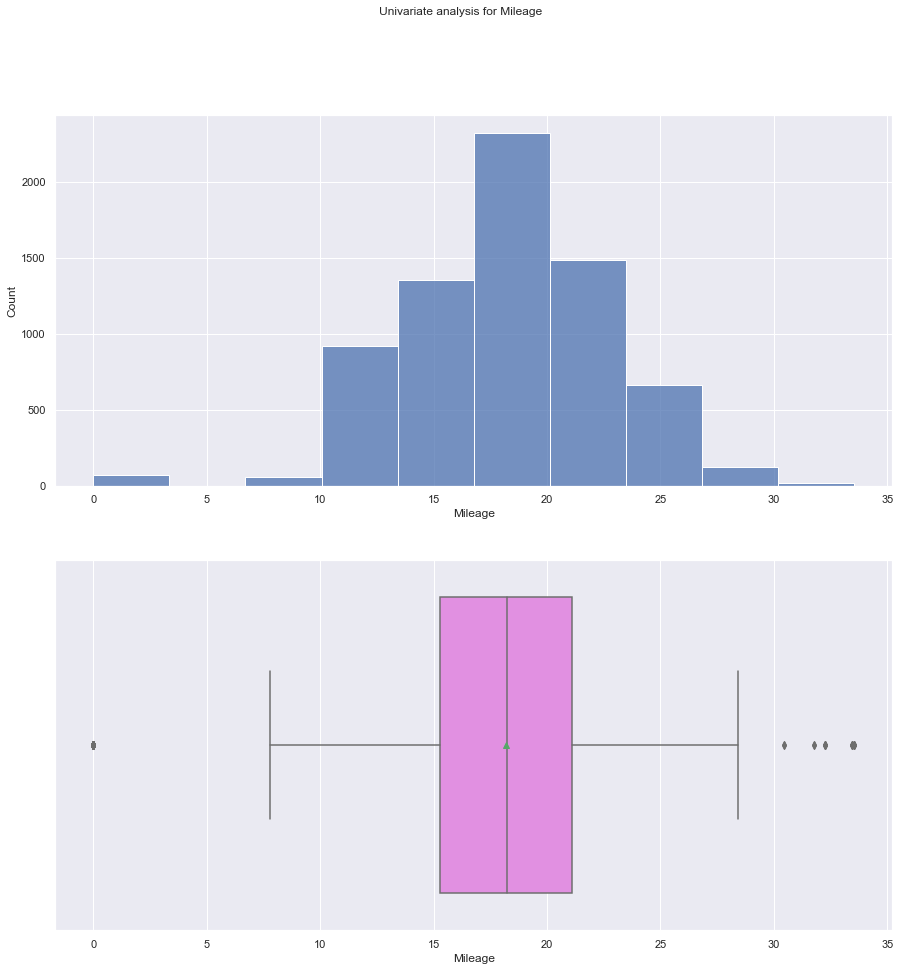

<IPython.core.display.Javascript object>

In [60]:
# generating univariate chart for mileage column to check data spread and outlier range
generate_univariate_chart(data=df, feature="Mileage", hue=None, bins=10, kde=False)

### Observation on Mileage 

* 90% cars have mileage between 10 to 25, mean is 19 KM
* mileage is normally distrubuted from 16 to 22 KM 
* has some outliers with 0 and beyond 30 KMs

### Engine size

Genrating Charts for feature : Engine


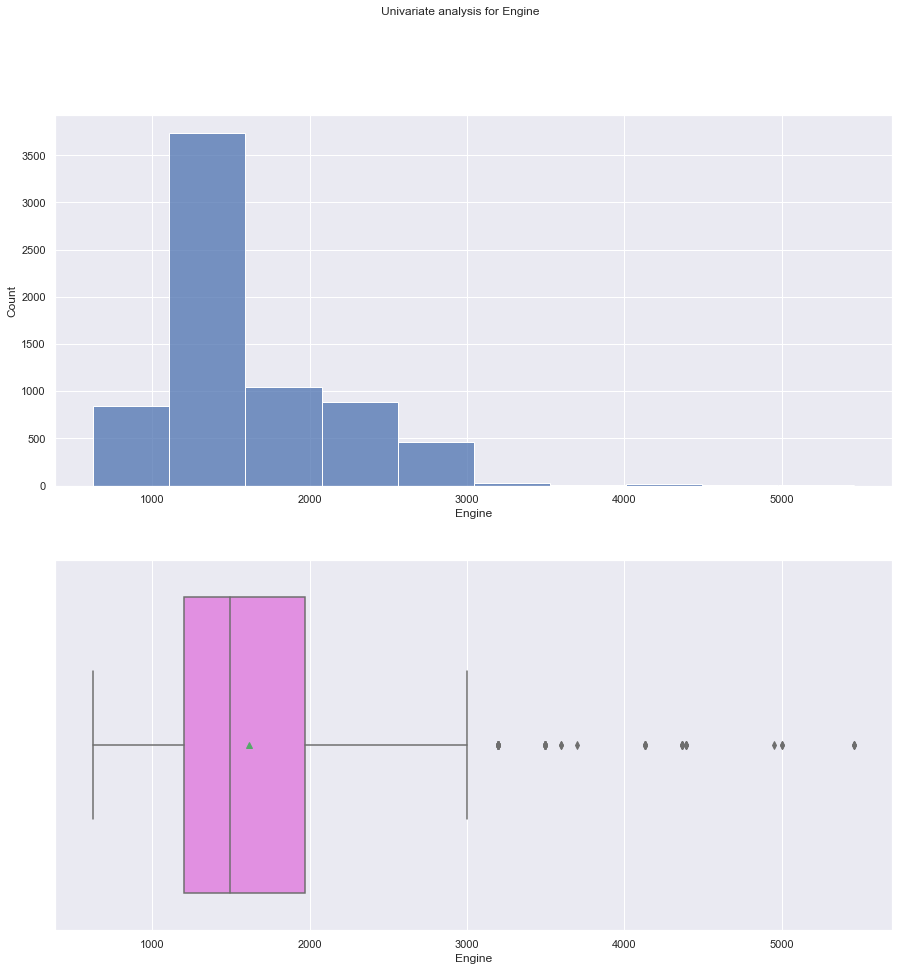

<IPython.core.display.Javascript object>

In [61]:
# generating univariate chart for engine size column to check data spread and outlier range
generate_univariate_chart(data=df, feature="Engine", hue=None, bins=10, kde=False)

### Observation on Engine 

* 75% cars have engine power 400 to 3000, mean is around 1600
* Engine size slightly right skewed with some outliers beyond 3000 engine size 

### Power


Genrating Charts for feature : Power


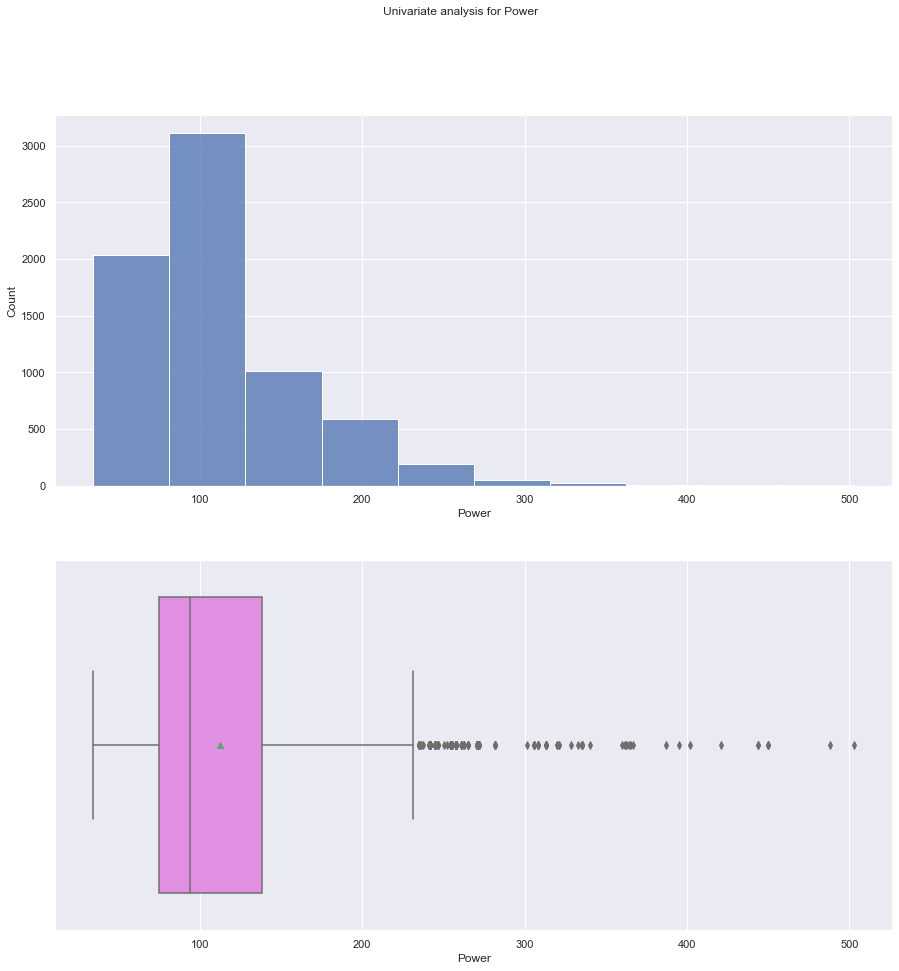

<IPython.core.display.Javascript object>

In [62]:
# generating univariate chart for power column to check data spread and outlier range
generate_univariate_chart(data=df, feature="Power", hue=None, bins=10, kde=False)

### Observation on Power 

* 90% cars have  power 40 to 200, mean is around 120
*  power heavy-right skewed with some outliers beyond 230  


Genrating Charts for feature : Seats


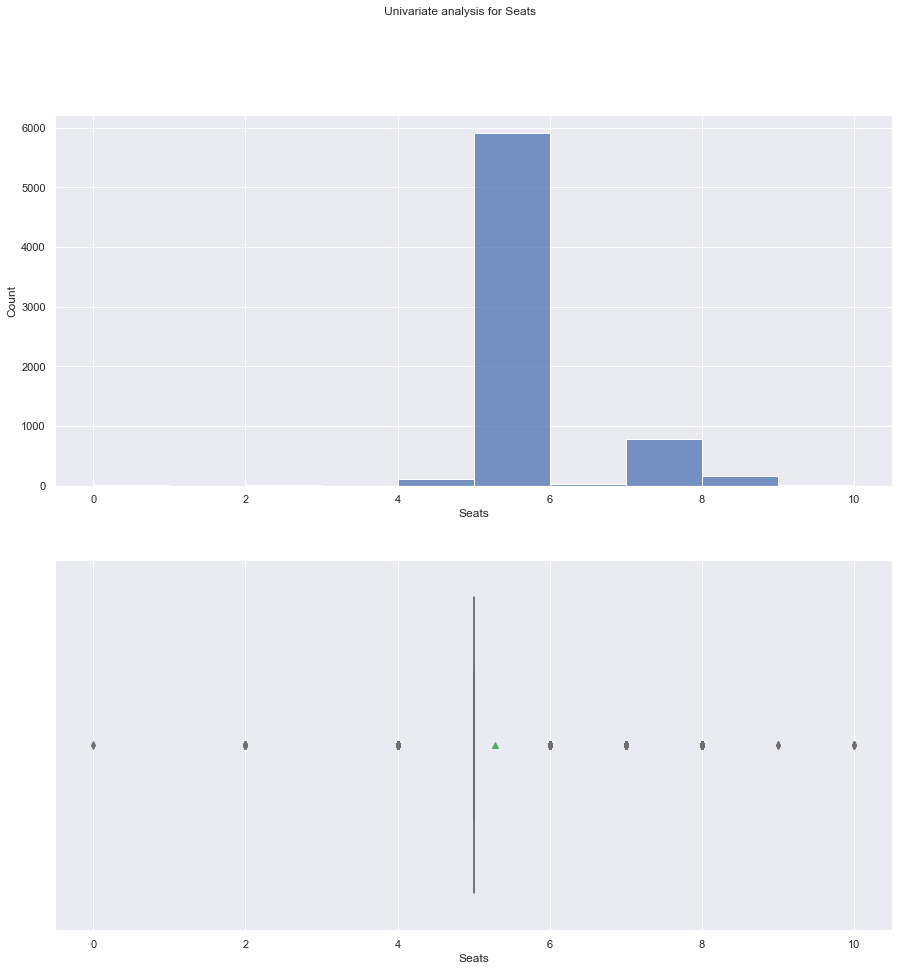

<IPython.core.display.Javascript object>

In [63]:
# generating univariate chart for price column to check data spread and outlier range
generate_univariate_chart(data=df, feature="Seats", hue=None, bins=10, kde=False)

# converting seats to category type column

df["Seats"] = df["Seats"].astype("float64")

### Observation on Seats 

* Most of the car are 5 seater, there are some 7 to 10 seater van type cars
* seats are left/right skewed very small number of cars
* seats can be converted to Category

### kilometers driven


Genrating Charts for feature : Kilometers_Driven_log


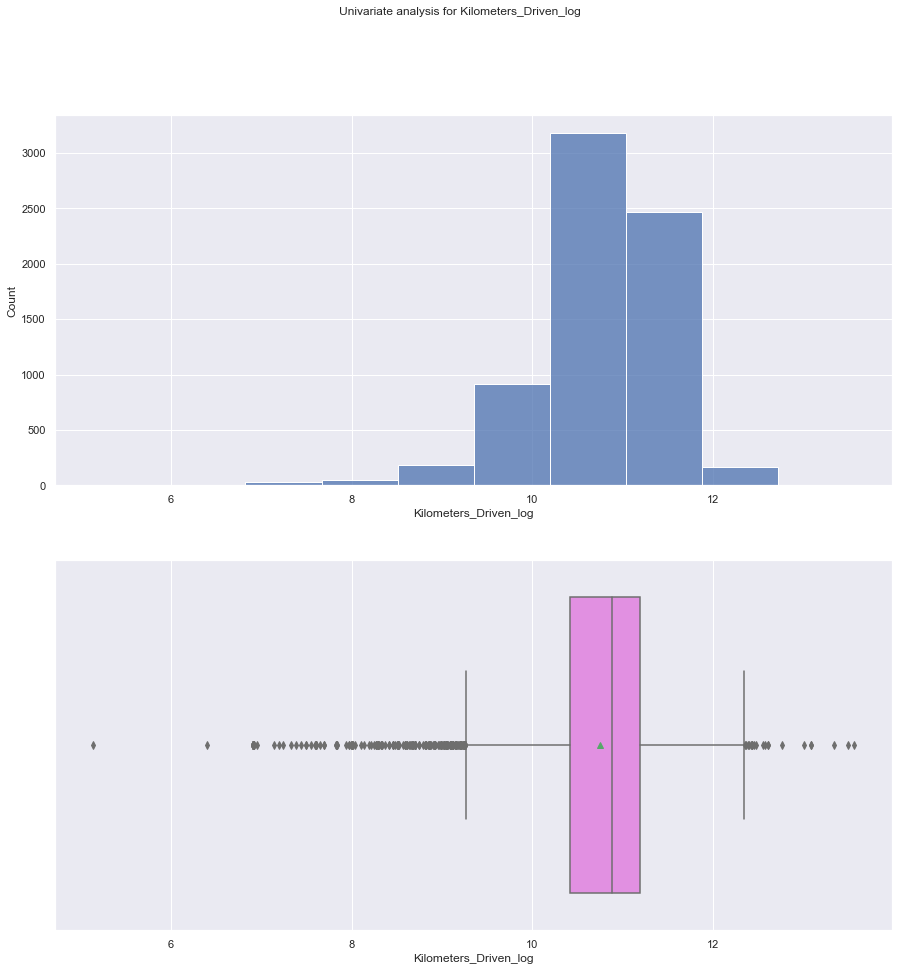

<IPython.core.display.Javascript object>

In [64]:
# with all params
generate_univariate_chart(
    data=df, feature="Kilometers_Driven_log", hue=None, bins=10, kde=False
)

### Observation on Kilometers_Driven 

* its in log scale 
* looks better after fixing exterme outlier
* 75% cars driven around 70K Kms, mean is around 75K
* still some skewness of both left and right hand side, - those are valid cars - no need to delete those.

## univariate analysis on Categories 

### method to generate count plot 

In [65]:
## Common method to genrate count graphs for category type columns


def generate_count_chart(df, feature):
    """
    Builds count plot for given column
    """
    plt.figure(figsize=(20, 8))
    chart = sns.countplot(x=feature, data=df, order=df[feature].value_counts().index)
    chart.set_xticklabels(
        chart.get_xticklabels(),
        rotation=45,
        horizontalalignment="right",
        fontweight="light",
        fontsize="x-large",
    )

<IPython.core.display.Javascript object>

### Counts by Make and Price Type

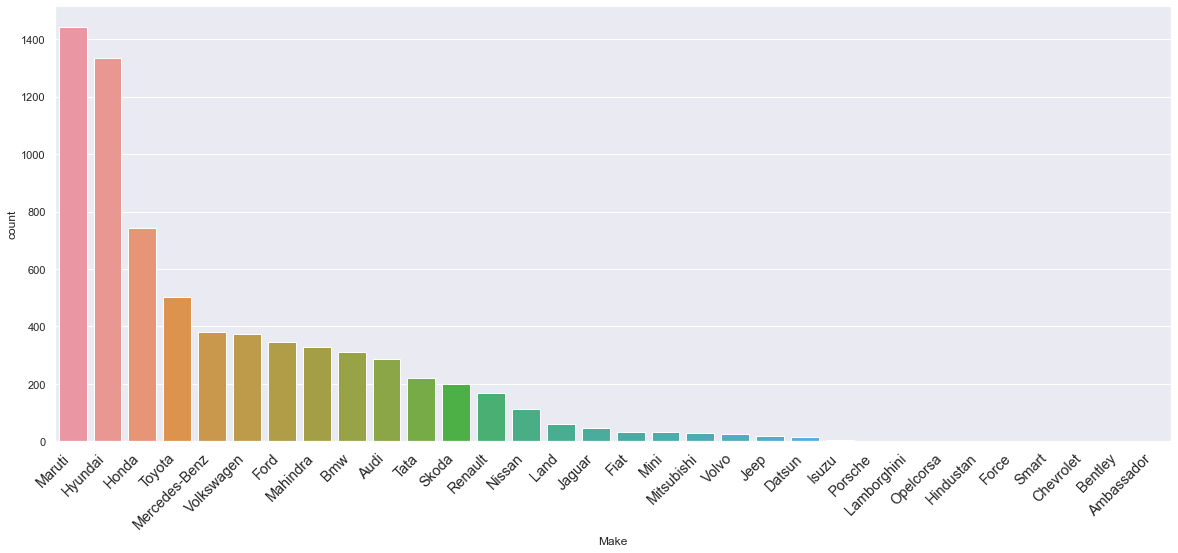

<IPython.core.display.Javascript object>

In [66]:
generate_count_chart(df, "Make")

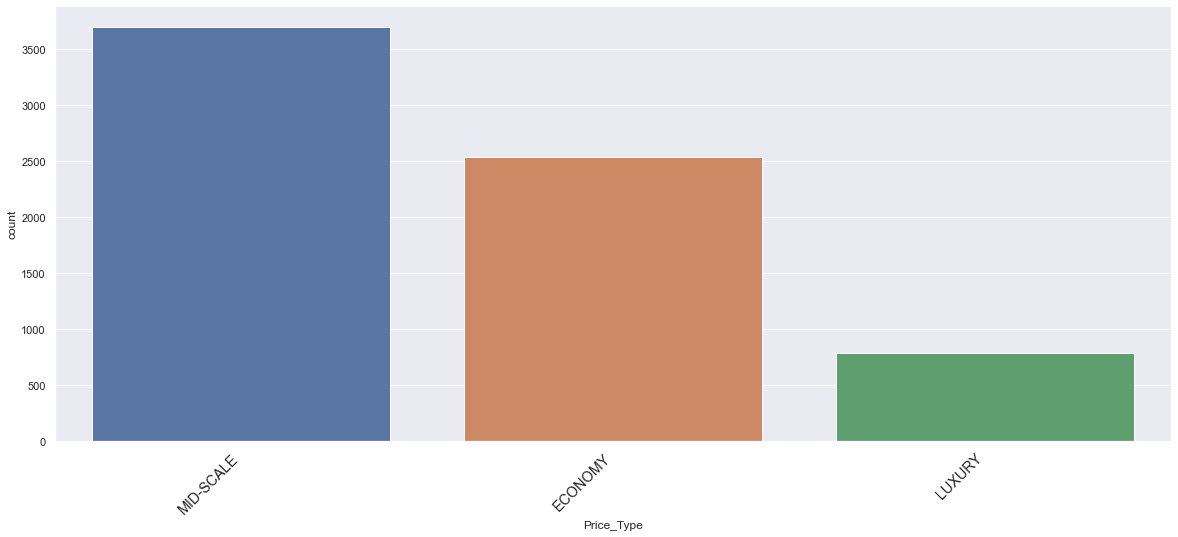

<IPython.core.display.Javascript object>

In [67]:
generate_count_chart(df, "Price_Type")

### Observations

* most of the cars in inventory are Maruthi & hyundai, followed by Honda and Toyota
* price type and mid scale are more then economy and few luxury cars 
* price type cateogory really helps because of top cars sold are not luxury types so their prices will not influence other cars 


### age of the car


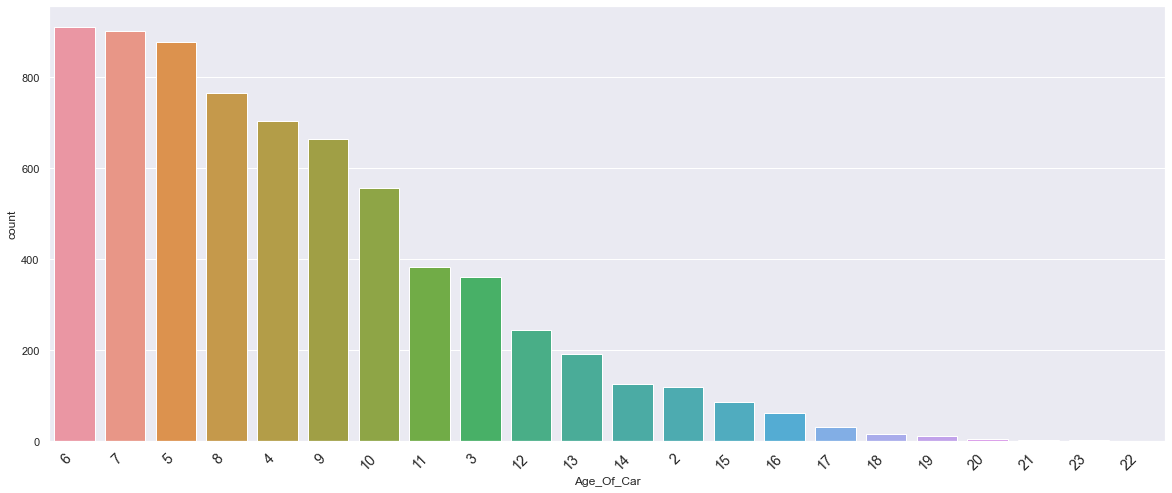

<IPython.core.display.Javascript object>

In [68]:
generate_count_chart(df, "Age_Of_Car")

### Observations

* most of the cars sold are 3 to 10 yrs 
* there are some old cars 

### location

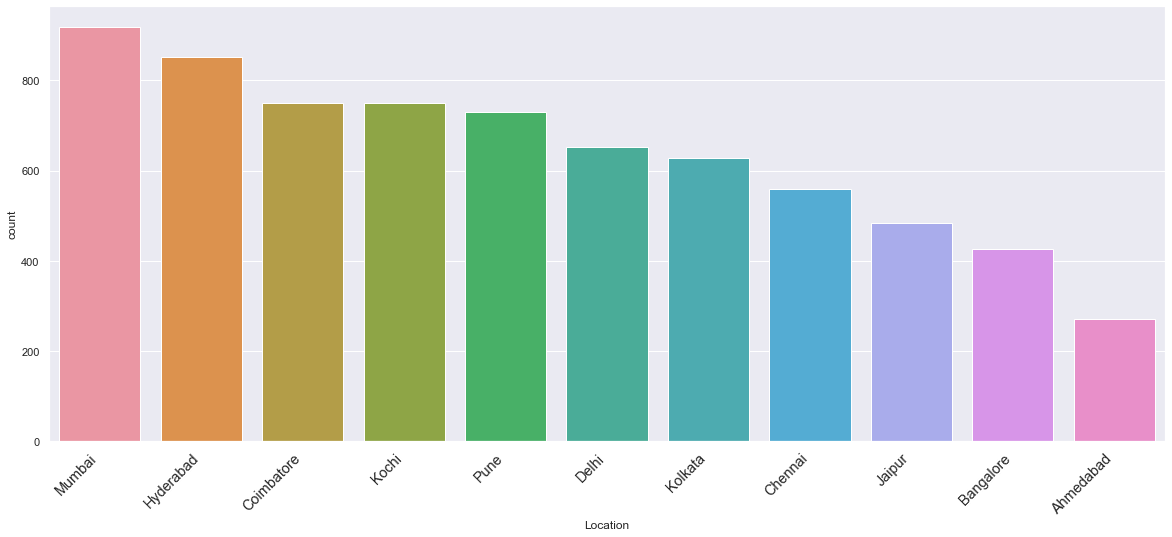

<IPython.core.display.Javascript object>

In [69]:
generate_count_chart(df, "Location")

### Observations

* mumbai and hyderabad sold most cars followred by coimbaore, kochi and pune
#fuel type 

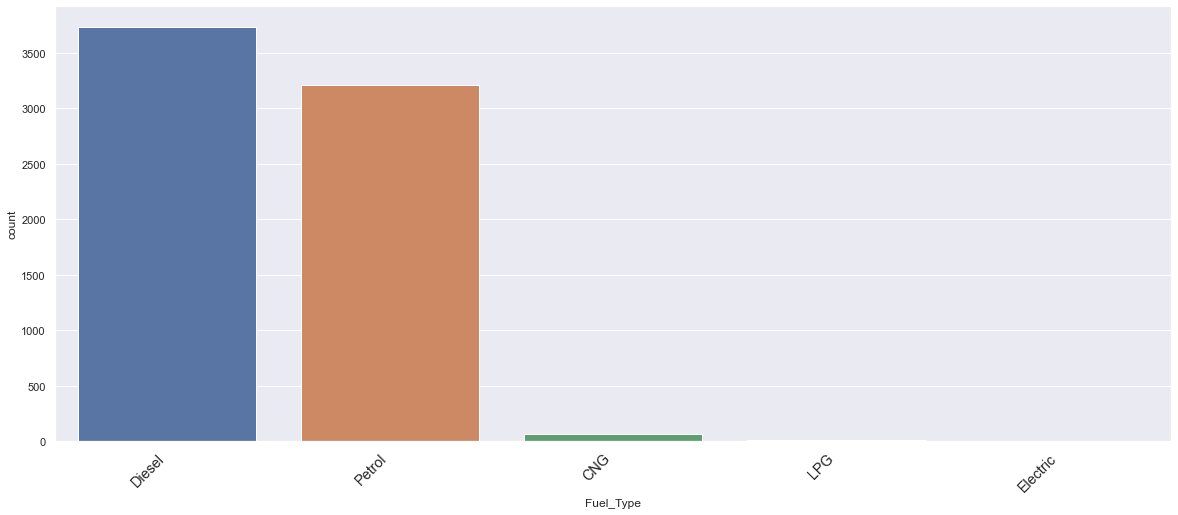

<IPython.core.display.Javascript object>

In [70]:
generate_count_chart(df, "Fuel_Type")

### Observations

* most of the cars sold are diesel and petrol types 

### transmission

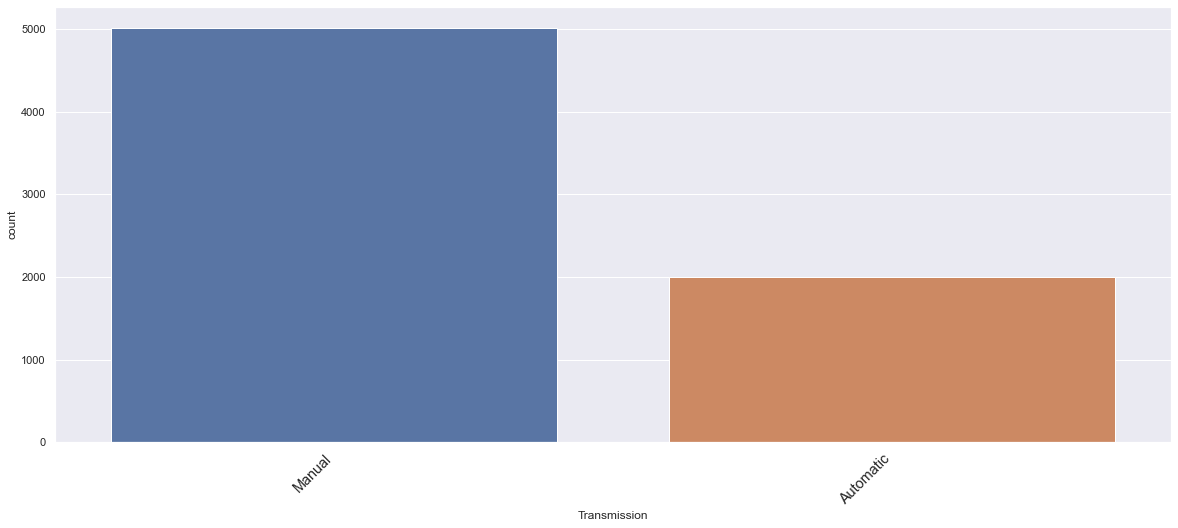

<IPython.core.display.Javascript object>

In [71]:
generate_count_chart(df, "Transmission")

### Observations

* only 2 types automatic and manual, manual is most 

### owner type

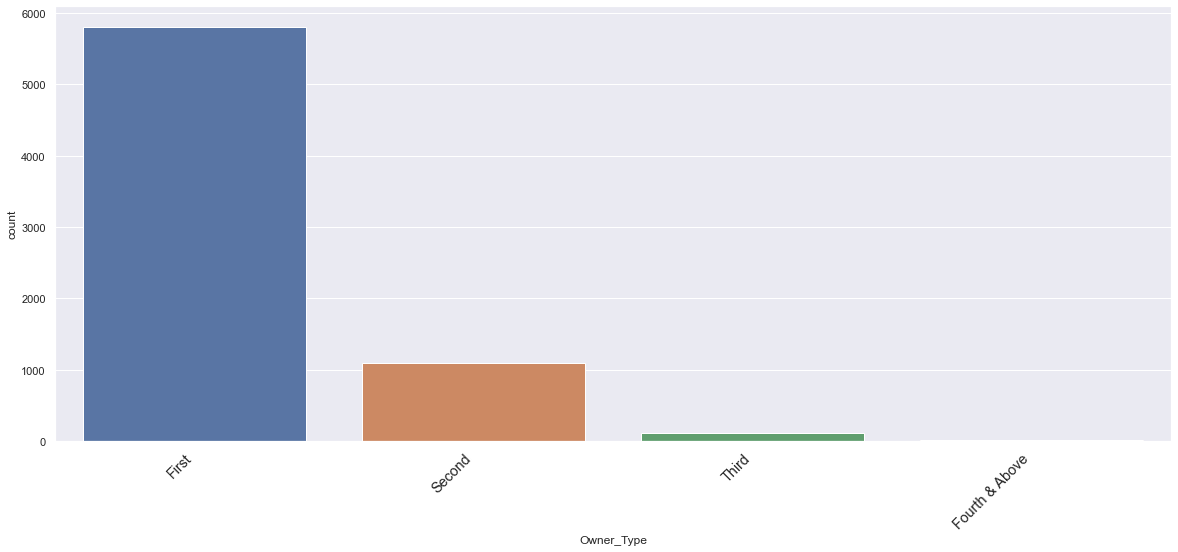

<IPython.core.display.Javascript object>

In [72]:
generate_count_chart(df, "Owner_Type")

### Observations

* most of the cars are first hand owned, followed by second, there are few third and above.

### seats

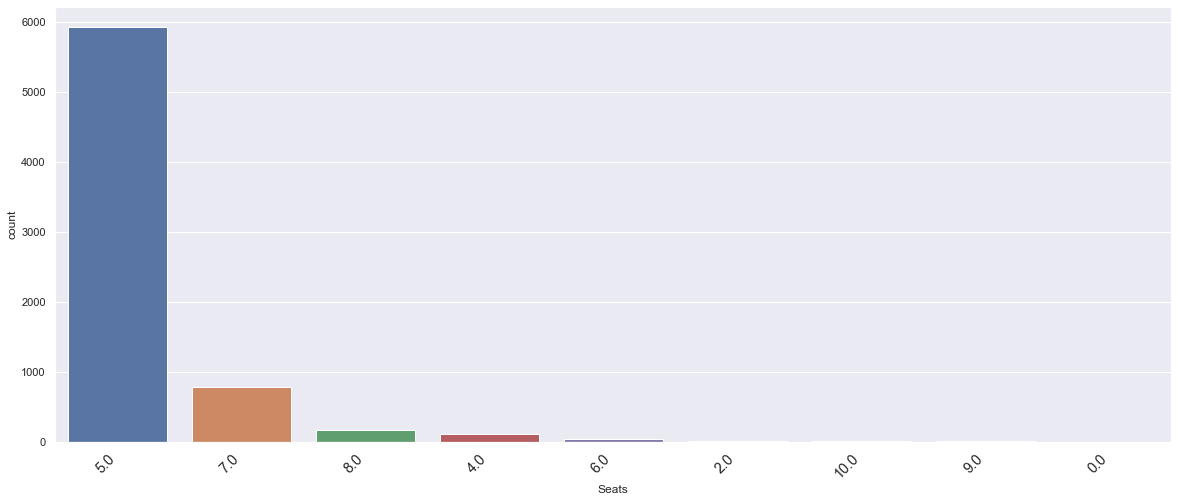

<IPython.core.display.Javascript object>

In [73]:
generate_count_chart(df, "Seats")

### Observations

* 95% cars are 5 or 7 seaters 
* there are few other seat types also 

## Bivariate analysis - Heat map & Pair Plot

* understand data relation between all the numerical features using Heat Map and Pair Plots


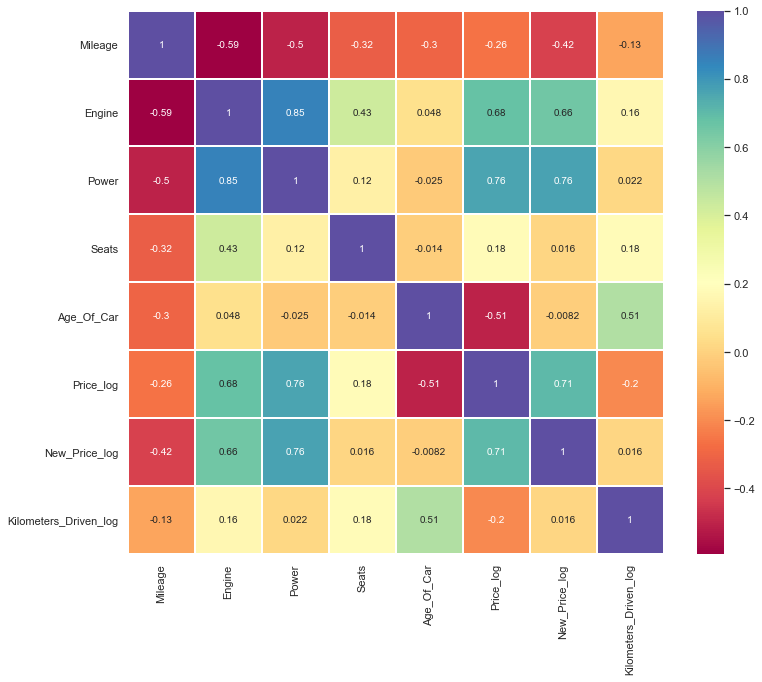

<IPython.core.display.Javascript object>

In [74]:
# Generate Corelation chart and understand how these features are related
def generate_matrix_chart(data):
    """
    Generate corelation chart(heat-map) between all numerial features 
    """
    sns.set_style("darkgrid")
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        data.corr(), cmap="Spectral", linecolor="white", linewidths=1, annot=True
    )


generate_matrix_chart(df)

### observations on heatmap 

* price column is highly correlated power,engine,age of car, new_price either positve or negatively related
* Mileage coloumn is related with engine, power negatively 
* engine column is highly correlated with power

we have to keep these in mind when build a Linear model 

### pair plot 


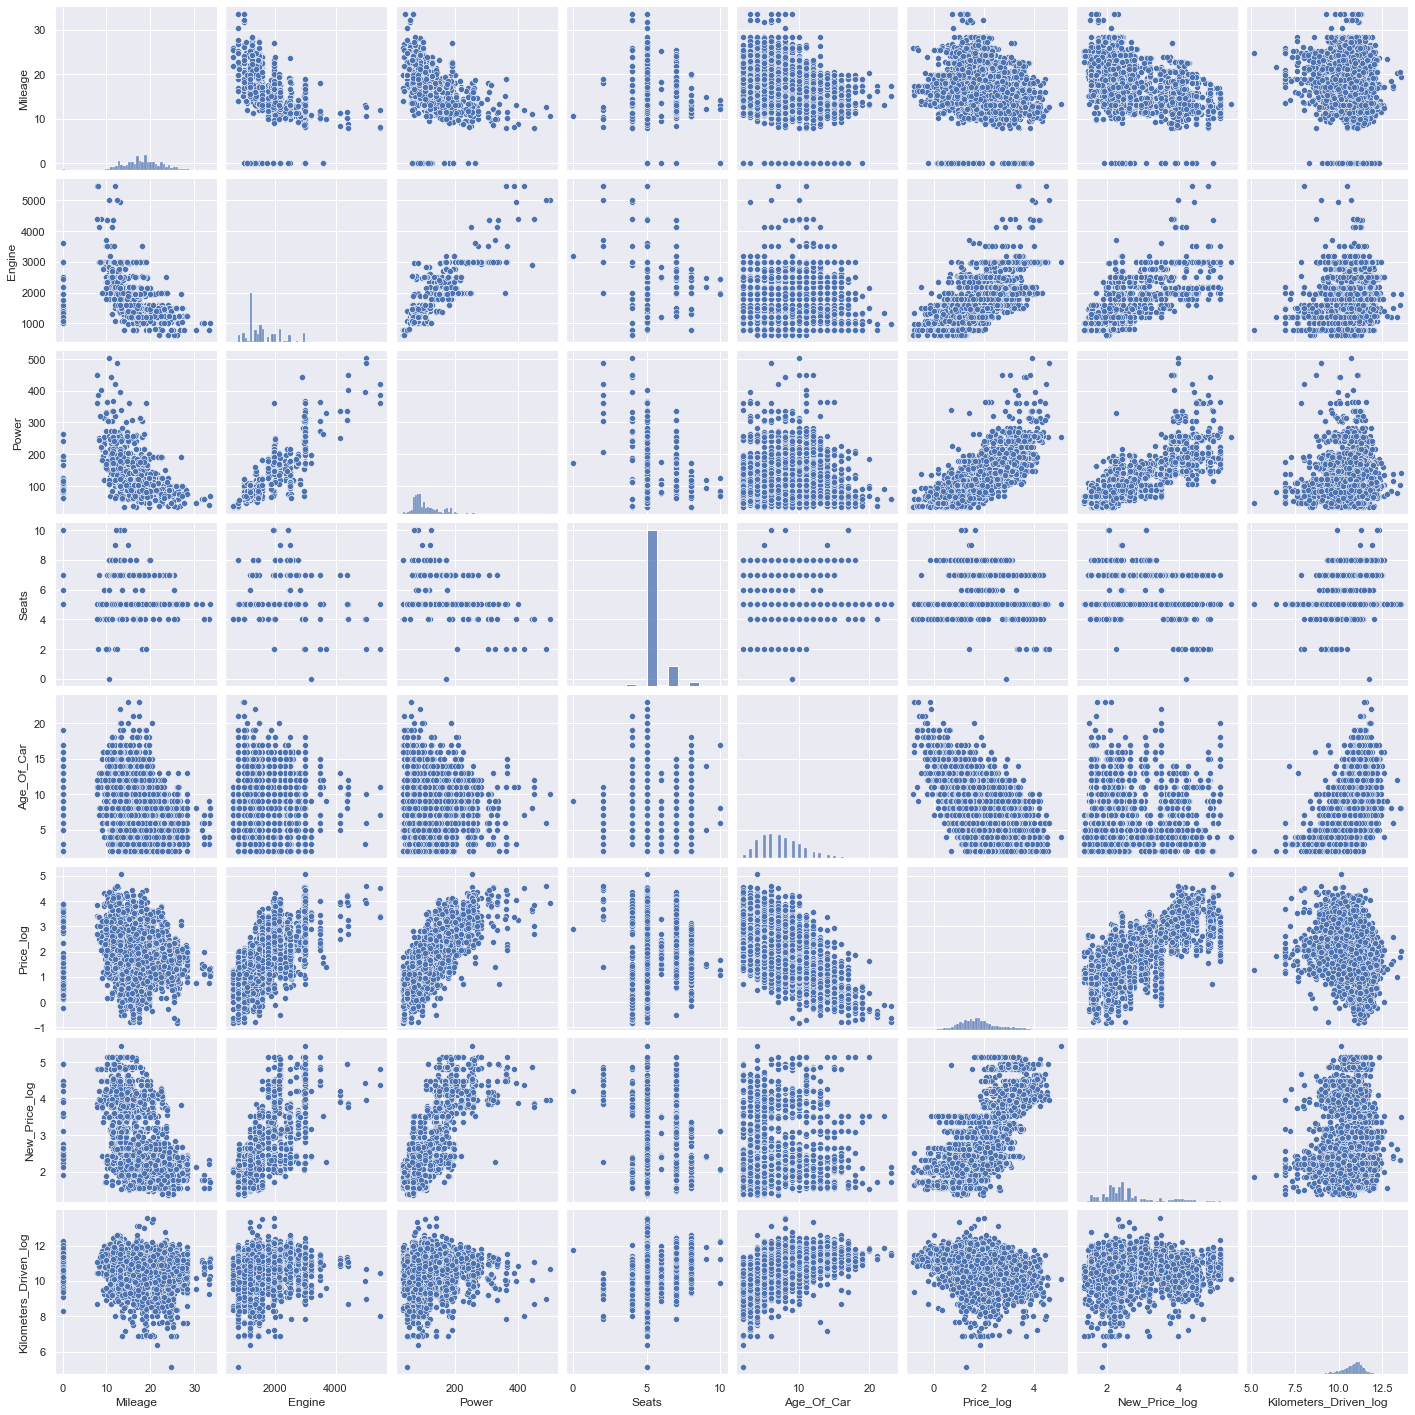

<IPython.core.display.Javascript object>

In [75]:
def generate_pairplot_chart(data, hue=None):
    """
    Generate pair plot for all features
    """
    sns.set_style("darkgrid")
    sns.pairplot(data, hue=hue, palette="magma")


generate_pairplot_chart(df)

### observations on pair plot  
* all observations found on heat map can be visualized in pair plot 
* price column is highly correlated power,engine,age of car, new_price either positve or negatively related
* Mileage coloumn is related with engine, power negatively 
* engine column is highly correlated with power


## Bivariate analysis  -  feature vs price


## lets see how prices is realted with critical numeric features 


### common method to generate joint plot 

In [76]:
## this method generate joint plot of x vs y feature
def generate_bivariate_chart(data, xfeature, yfeature, hue=None):
    """
    common method to generate joint plot for various columns
    hue param is optional
    """
    sns.set_style("darkgrid")
    print(f"Genrating Charts for feature x : {xfeature}, y : {yfeature}")

    sns.jointplot(
        data=data,
        x=xfeature,
        y=yfeature,
        palette="winter",
        height=10,
        kind="scatter",
        hue=hue,
    )

<IPython.core.display.Javascript object>

### power vs price 

Genrating Charts for feature x : Power, y : Price_log


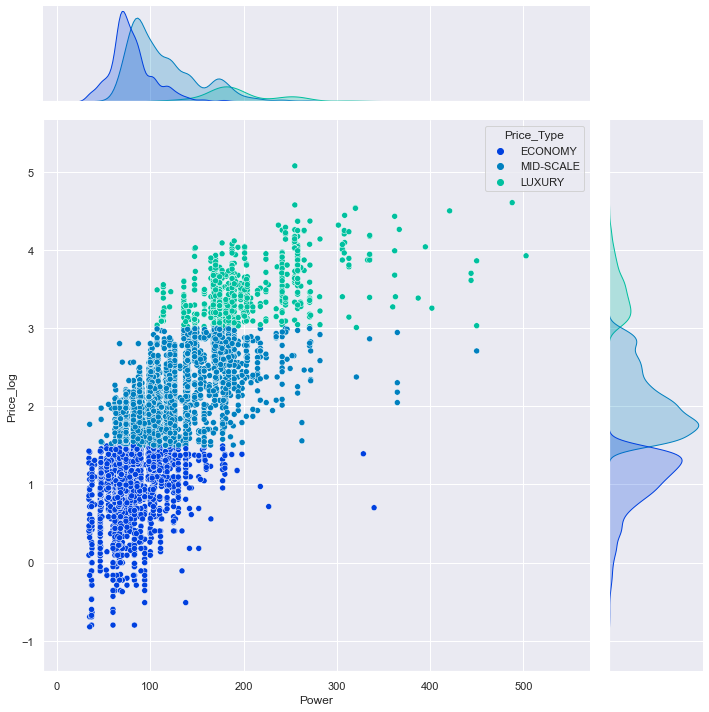

<IPython.core.display.Javascript object>

In [77]:
generate_bivariate_chart(
    xfeature="Power", yfeature="Price_log", data=df, hue="Price_Type"
)

### observation on power vs price 

* as we can see these 2 features a related as the power increase price also increase 

###  engine vs price 

Genrating Charts for feature x : Engine, y : Price_log


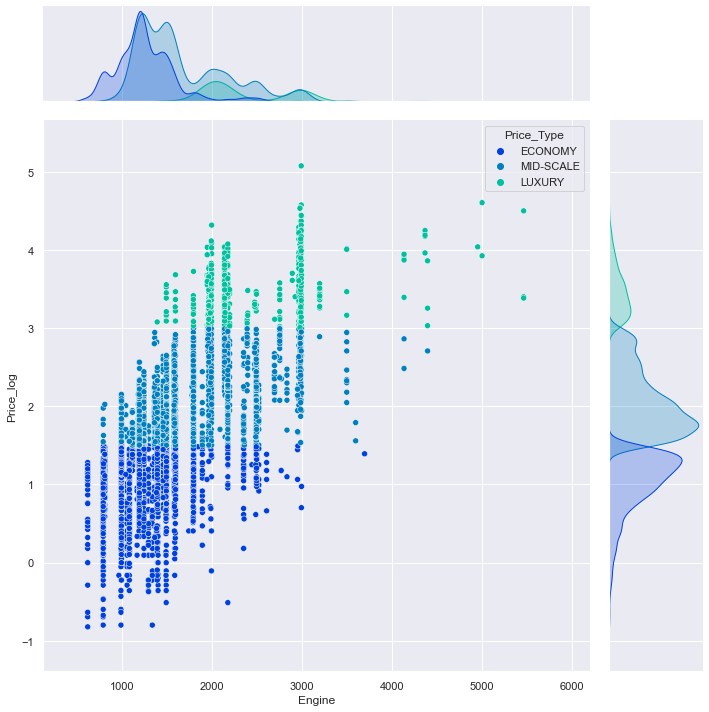

<IPython.core.display.Javascript object>

In [78]:
generate_bivariate_chart(
    xfeature="Engine", yfeature="Price_log", data=df, hue="Price_Type"
)

### observation on engine vs price 

* similar to power when engine size increase price also increase 

###  new_price vs price 

Genrating Charts for feature x : New_Price_log, y : Price_log


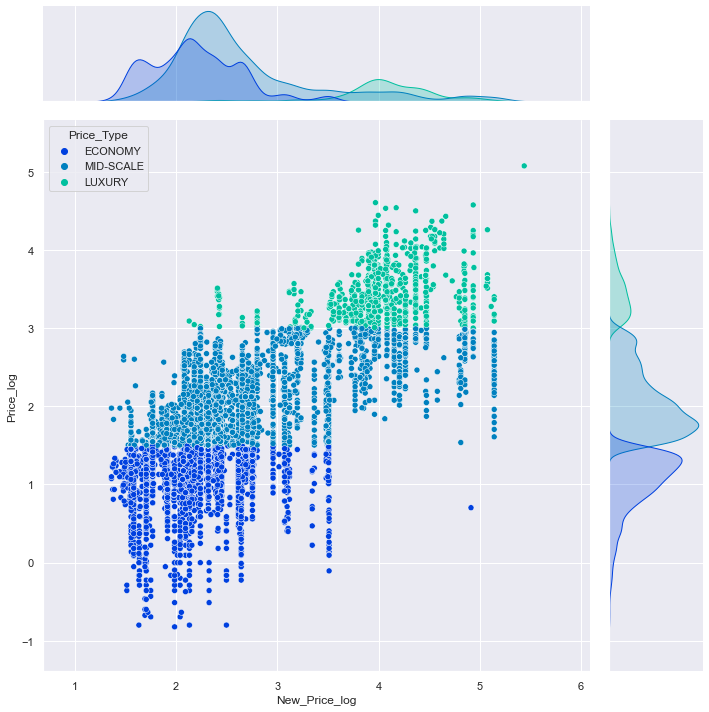

<IPython.core.display.Javascript object>

In [79]:
generate_bivariate_chart(
    xfeature="New_Price_log", yfeature="Price_log", data=df, hue="Price_Type"
)

### observation on new price vs price 

* new price plays deciding factor on price of a used car, as we can see when both prices are increasing

###  mileage vs price 

Genrating Charts for feature x : Mileage, y : Engine


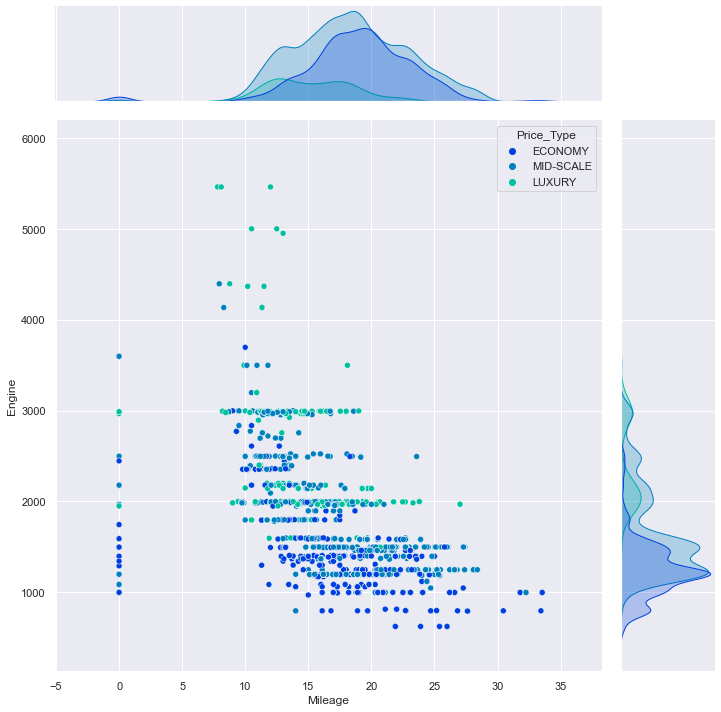

<IPython.core.display.Javascript object>

In [80]:
generate_bivariate_chart(
    xfeature="Mileage", yfeature="Engine", data=df, hue="Price_Type"
)

### observation on Mileage vs price 

* no clear relationship with price, this feature might not help determine price since it does not show strong relationship with price

###  Mileage vs price 

Genrating Charts for feature x : Mileage, y : Power


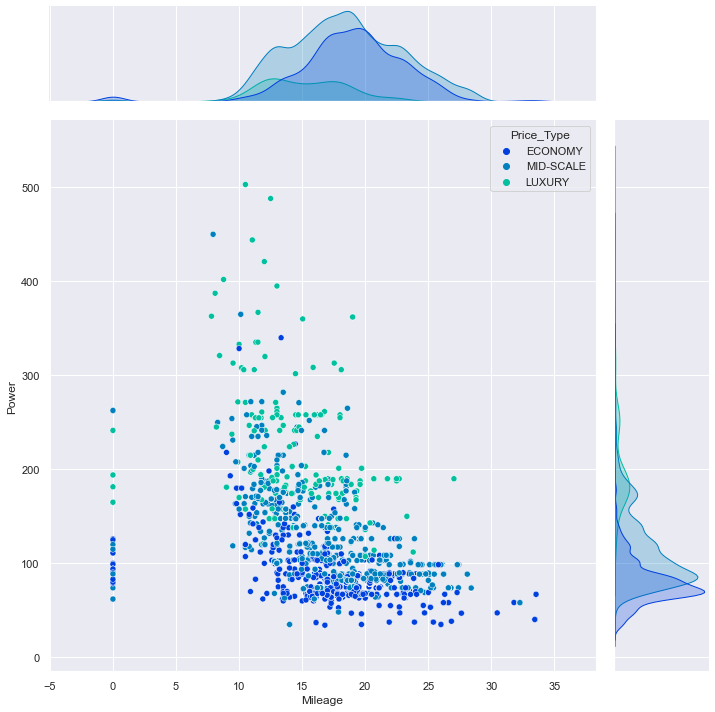

<IPython.core.display.Javascript object>

In [81]:
generate_bivariate_chart(
    xfeature="Mileage", yfeature="Power", data=df, hue="Price_Type"
)

### observation on mileage vs power

* similar to price and mileage, power and mileage does not have a stong relationship

###  engine vs power 

Genrating Charts for feature x : Engine, y : Power


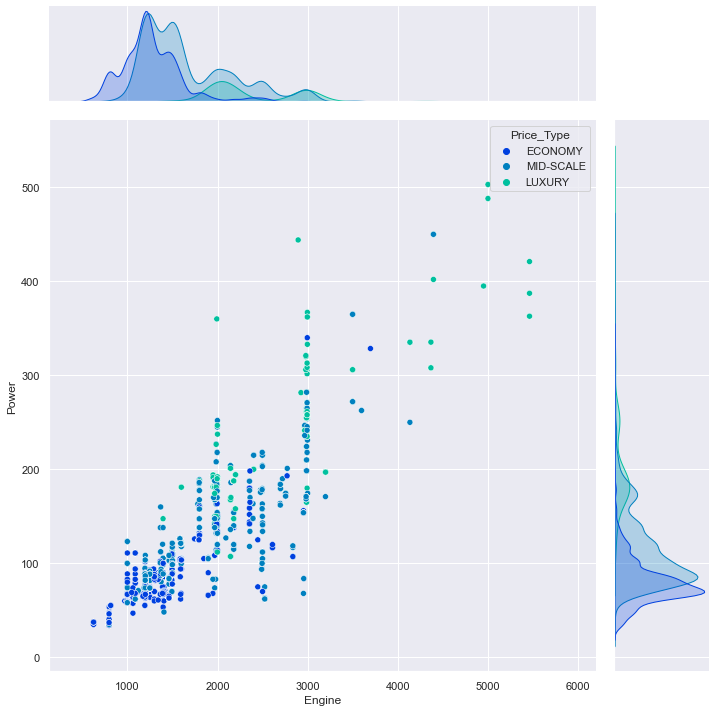

<IPython.core.display.Javascript object>

In [82]:
generate_bivariate_chart(xfeature="Engine", yfeature="Power", data=df, hue="Price_Type")

### observation on engine vs power

* power and engine shows strong relationship, as ensine size increase power also increases 

### power vs new price 

Genrating Charts for feature x : Power, y : New_Price_log


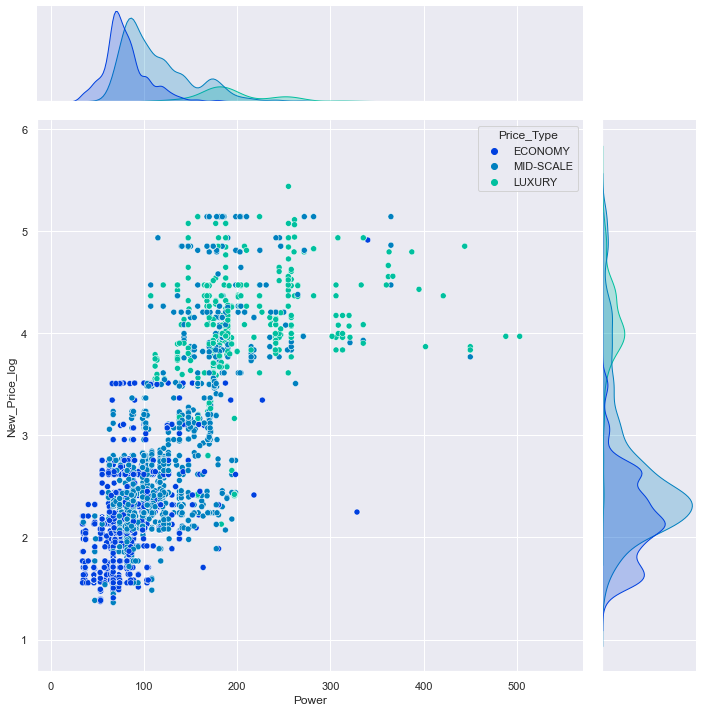

<IPython.core.display.Javascript object>

In [83]:
generate_bivariate_chart(
    xfeature="Power", yfeature="New_Price_log", data=df, hue="Price_Type"
)

### observation on power vs new price 

* similar to price, new price also shows significant relation with power

### engine vs new price 

Genrating Charts for feature x : Engine, y : New_Price_log


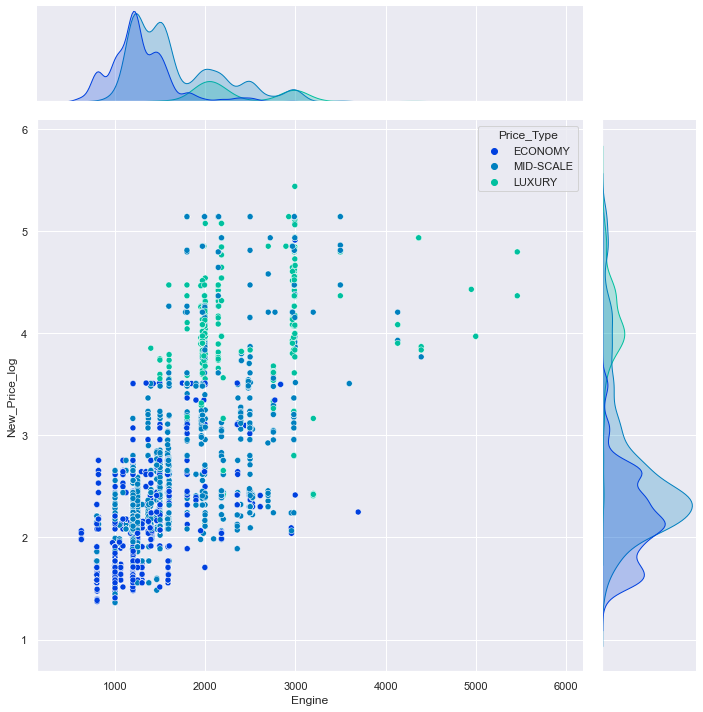

<IPython.core.display.Javascript object>

In [84]:
generate_bivariate_chart(
    xfeature="Engine", yfeature="New_Price_log", data=df, hue="Price_Type"
)

### observation on engine vs new price 

* similar to price, new price also shows strong relation with ensine size, more size now costly

## Bivariate analysis  -  Category vs price


## lets see how prices is realted with critical categorical features 


### common method to generate count plot and box plot

Genrating Charts for feature x : Location, y : Price_log


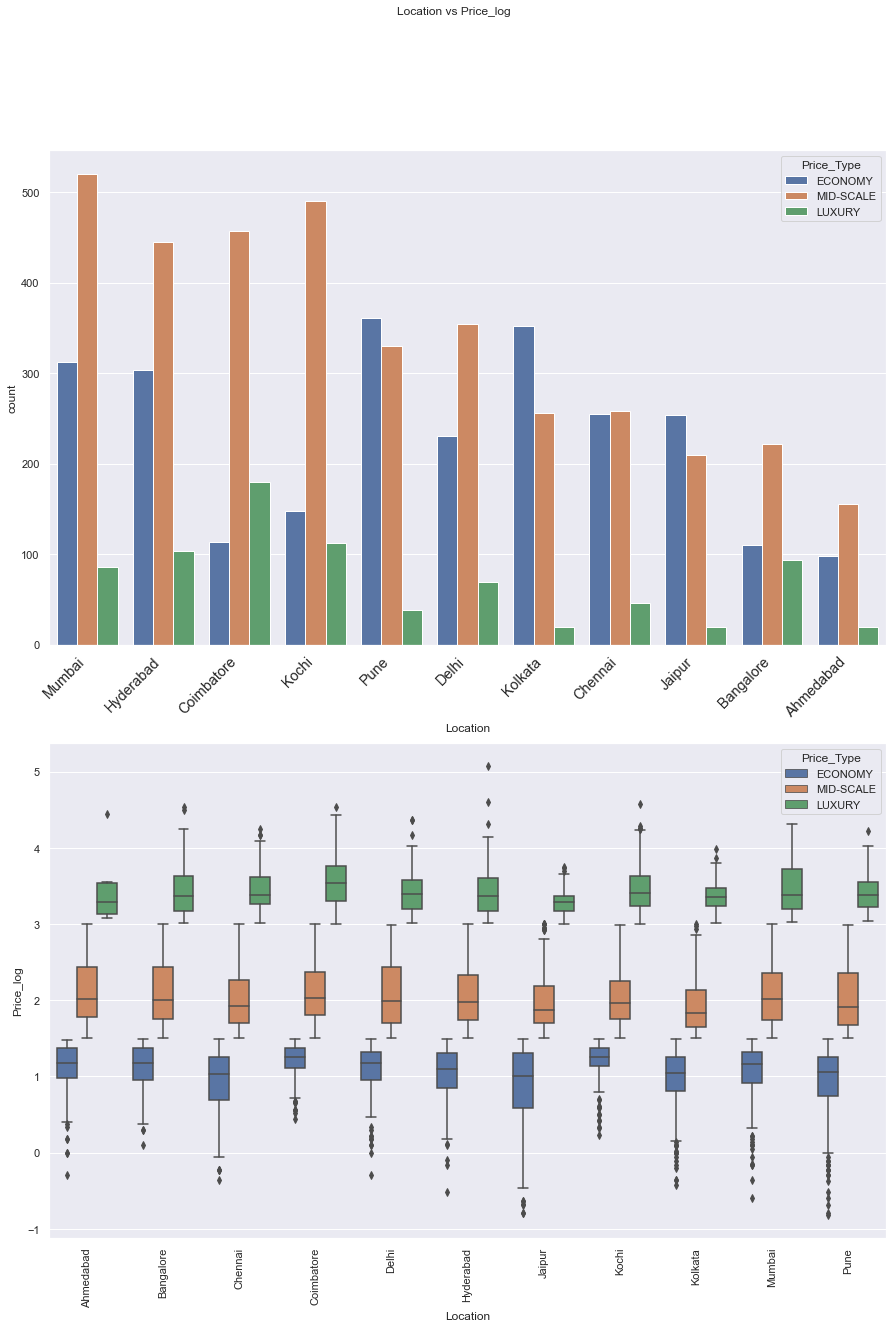

<IPython.core.display.Javascript object>

In [85]:
# method to generate x vs y count plot and box plot
def generate_category_chart(data, xfeature, yfeature, hue=None):
    """
    generate box plot and count plot for given x and y 
    """
    sns.set_style("darkgrid")
    print(f"Genrating Charts for feature x : {xfeature}, y : {yfeature}")

    # sns.jointplot(data=data , x=xfeature, y=yfeature, palette="winter", height=8,kind='scatter', hue=hue);
    fig, axes = plt.subplots(2, figsize=(15, 20))
    fig.suptitle(xfeature + " vs " + yfeature)

    chart = sns.countplot(
        x=xfeature,
        data=data,
        ax=axes[0],
        hue=hue,
        order=df[xfeature].value_counts().index,
    )
    chart.set_xticklabels(
        chart.get_xticklabels(),
        rotation=45,
        horizontalalignment="right",
        fontweight="light",
        fontsize="x-large",
    )

    sns.boxplot(x=xfeature, y=yfeature, hue=hue, data=data, ax=axes[1])
    plt.xticks(rotation=90)


generate_category_chart(
    xfeature="Location", yfeature="Price_log", data=df, hue="Price_Type"
)

Genrating Charts for feature x : Fuel_Type, y : Price_log


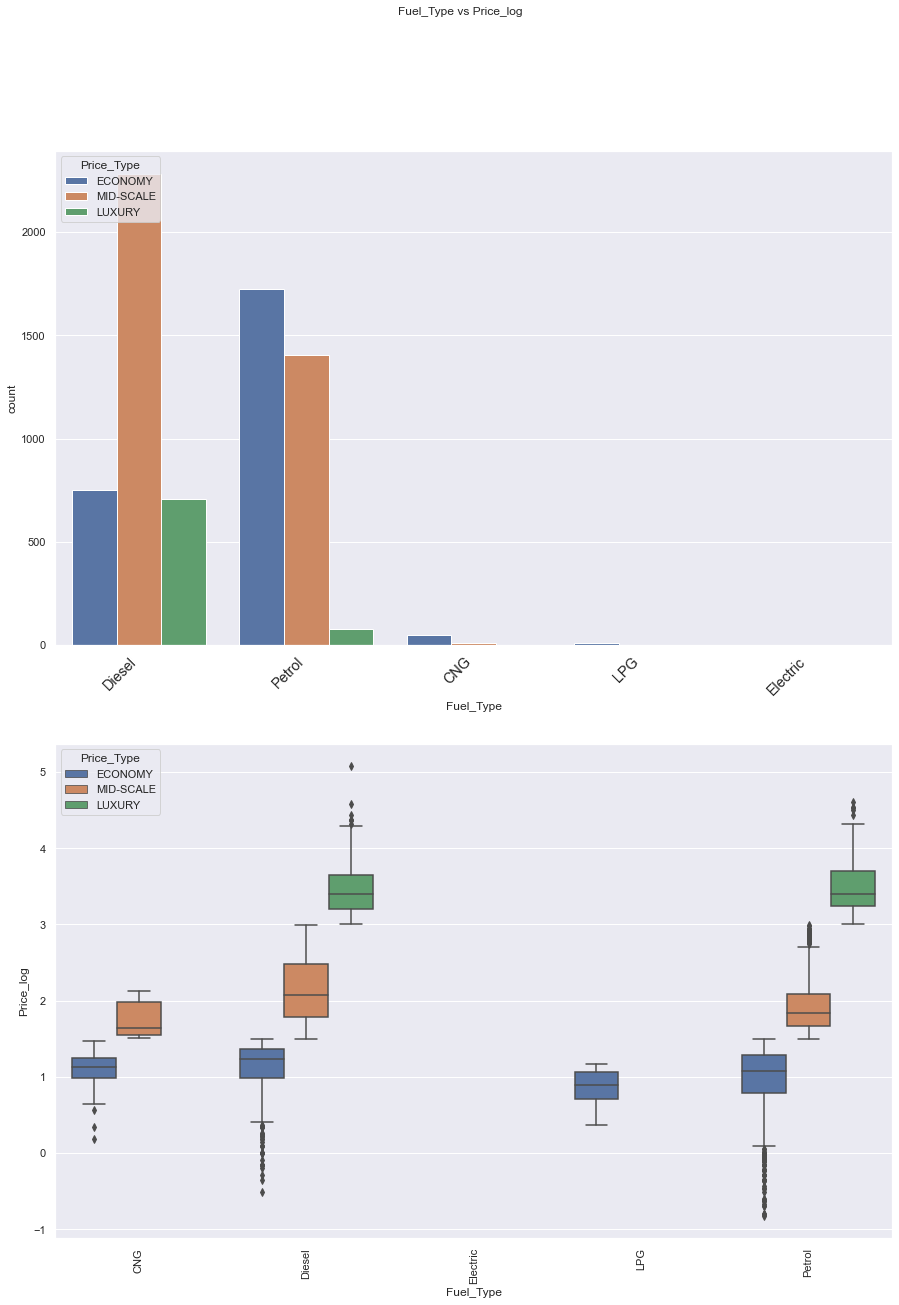

<IPython.core.display.Javascript object>

In [86]:
generate_category_chart(
    xfeature="Fuel_Type", yfeature="Price_log", data=df, hue="Price_Type"
)

Genrating Charts for feature x : Transmission, y : Price_log


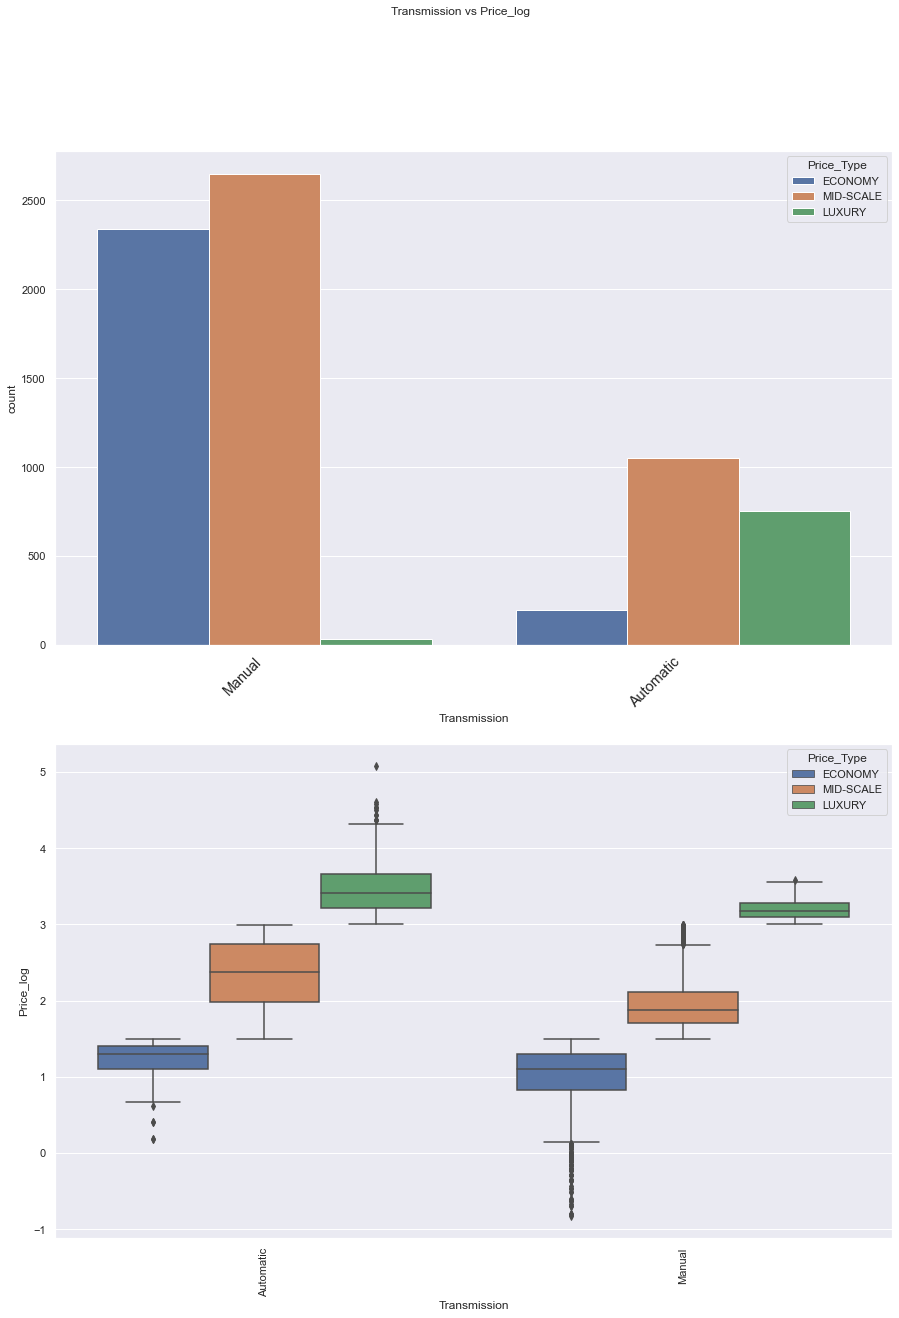

<IPython.core.display.Javascript object>

In [87]:
generate_category_chart(
    xfeature="Transmission", yfeature="Price_log", data=df, hue="Price_Type"
)

Genrating Charts for feature x : Owner_Type, y : Price_log


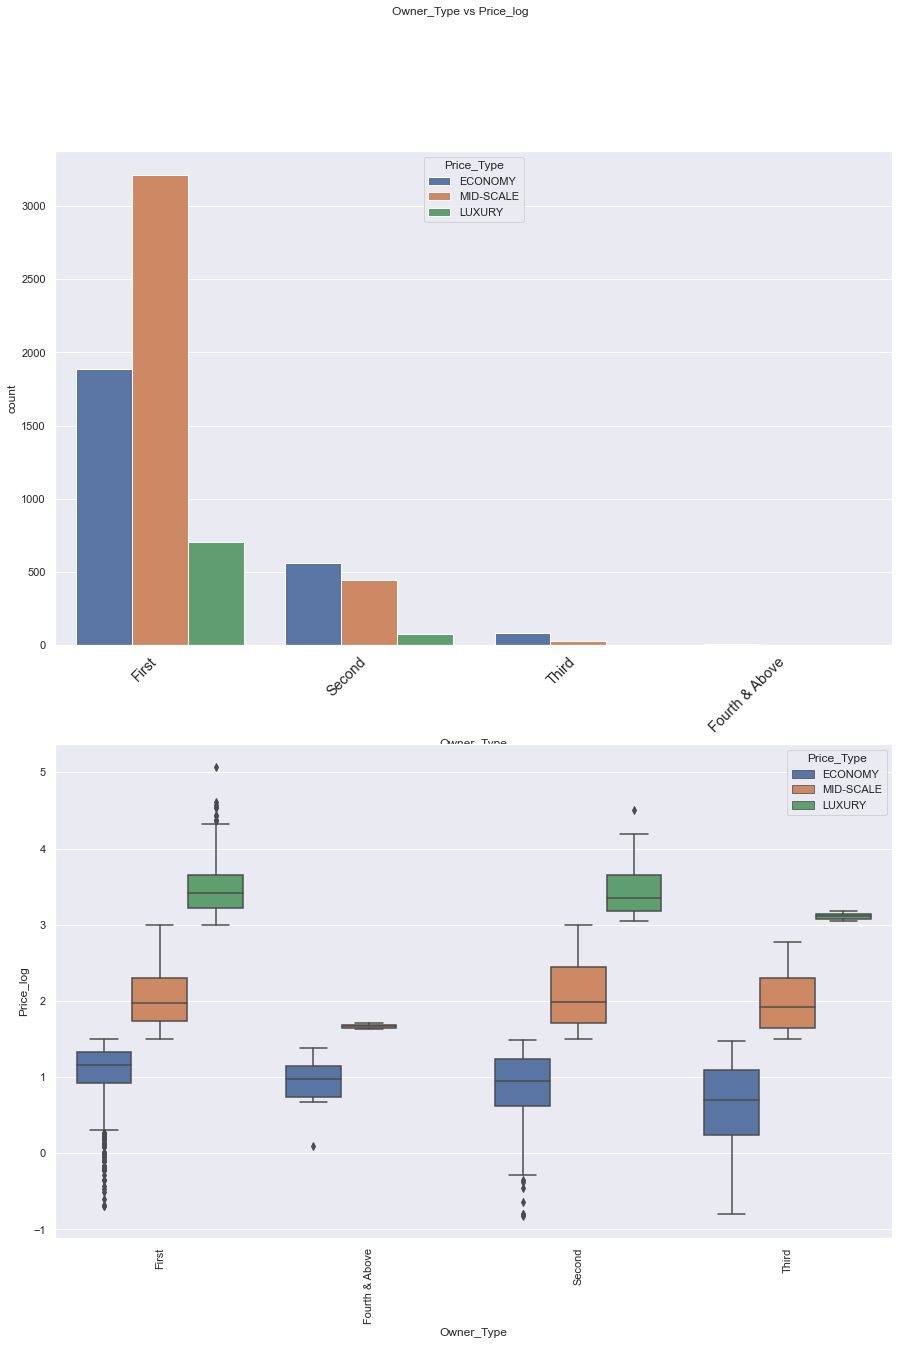

<IPython.core.display.Javascript object>

In [88]:
generate_category_chart(
    xfeature="Owner_Type", yfeature="Price_log", data=df, hue="Price_Type"
)

Genrating Charts for feature x : Make, y : Price_log


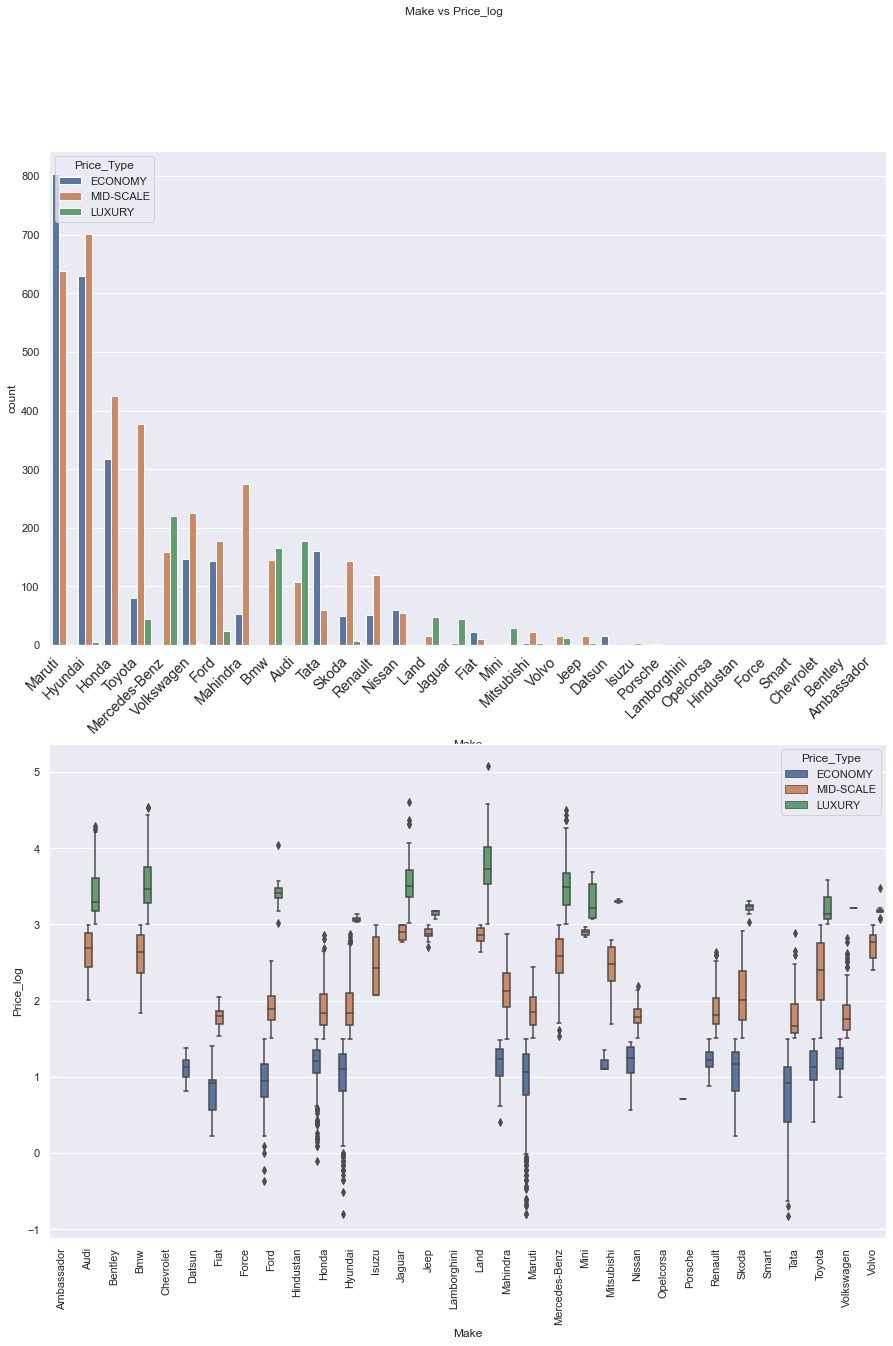

<IPython.core.display.Javascript object>

In [89]:
generate_category_chart(
    xfeature="Make", yfeature="Price_log", data=df, hue="Price_Type"
)

Genrating Charts for feature x : Age_Of_Car, y : Price_log


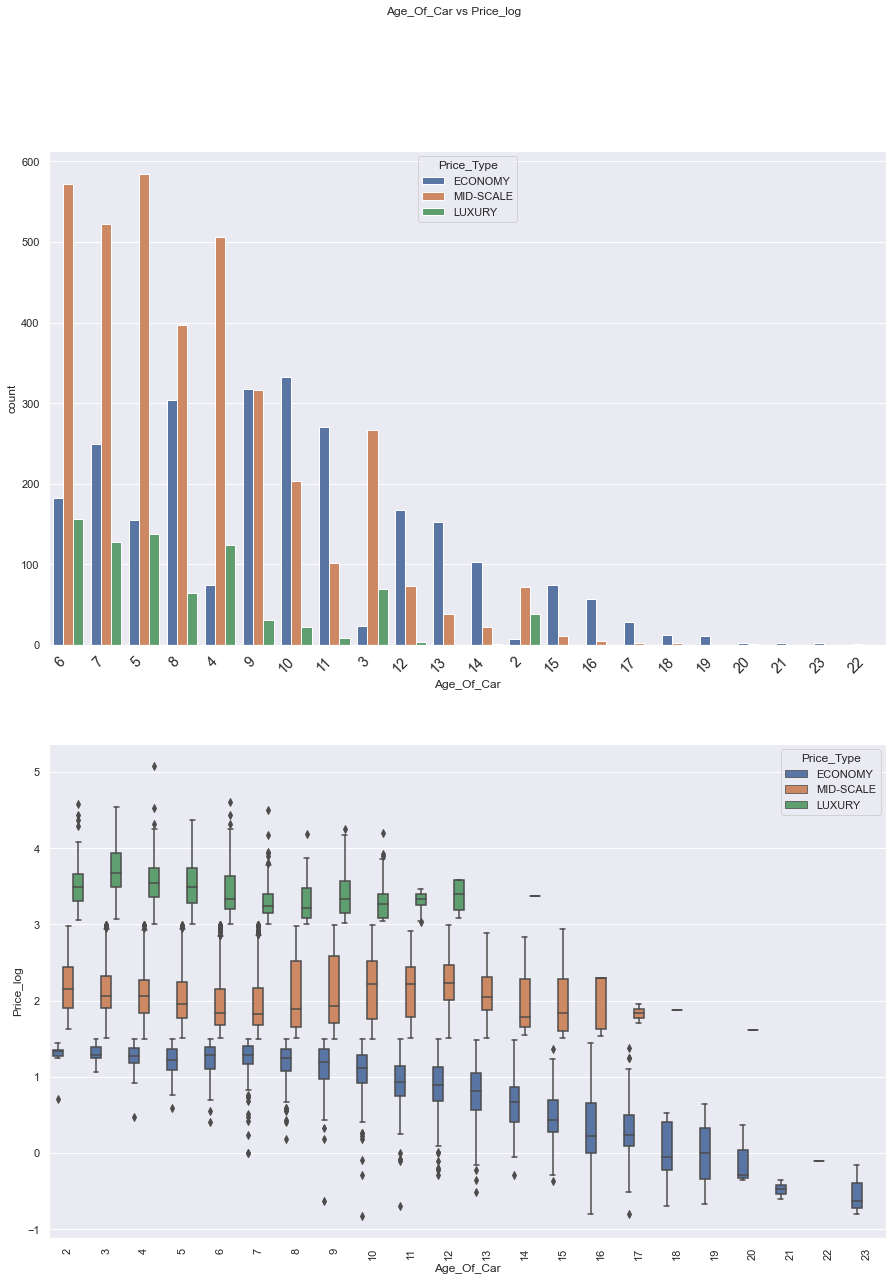

<IPython.core.display.Javascript object>

In [90]:
generate_category_chart(
    xfeature="Age_Of_Car", yfeature="Price_log", data=df, hue="Price_Type"
)

## observations on all category columns vs price 

* all these category columns play vital role in deciding price of a used car, accross all locations we can see fuel type, owner type, transmission, age of the car, make decides the price. 

# Model Building

lets build different linear models and understand its performance and accuracy in predicting the price of the used cars

## Build Different models 

### Model 1 - using all feaures 
### Model 2 - using all feaures deleting few category types 
### Model 3 - using Model 2 feaures without new price and highly correlated power or engine
### Model 4 - using only highly correlated features with price 
### Model 5 - using SequentialFeatureSelector to decide features


**all these models will be build, analyzed and scored similarly using same data** 


In [91]:
## checking data and its types

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7019 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               7019 non-null   category
 1   Fuel_Type              7019 non-null   category
 2   Transmission           7019 non-null   category
 3   Owner_Type             7019 non-null   category
 4   Mileage                7019 non-null   float64 
 5   Engine                 7019 non-null   float64 
 6   Power                  7019 non-null   float64 
 7   Seats                  7019 non-null   float64 
 8   Make                   7019 non-null   category
 9   Model                  7019 non-null   category
 10  Age_Of_Car             7019 non-null   int64   
 11  Price_log              7019 non-null   float64 
 12  New_Price_log          7019 non-null   float64 
 13  Kilometers_Driven_log  7019 non-null   float64 
 14  Price_Type             7019 non-null   c

<IPython.core.display.Javascript object>

In [92]:
# converting age of car and seats as category type
"""
cat_vars = ["Age_Of_Car", "Seats"]
for colname in cat_vars:
    df[colname] = df[colname].astype("category")

print_data_types(df)
"""



'\ncat_vars = ["Age_Of_Car", "Seats"]\nfor colname in cat_vars:\n    df[colname] = df[colname].astype("category")\n\nprint_data_types(df)\n'

<IPython.core.display.Javascript object>

### Model 1 - using all feaures 

### Define independent and dependent variables

In [93]:
# we dont need Model, Delete Model Column(its almost unique)

X_1 = df.drop(["Price_log", "Model"], axis=1)
y_1 = df["Price_log"]

X_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7019 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               7019 non-null   category
 1   Fuel_Type              7019 non-null   category
 2   Transmission           7019 non-null   category
 3   Owner_Type             7019 non-null   category
 4   Mileage                7019 non-null   float64 
 5   Engine                 7019 non-null   float64 
 6   Power                  7019 non-null   float64 
 7   Seats                  7019 non-null   float64 
 8   Make                   7019 non-null   category
 9   Age_Of_Car             7019 non-null   int64   
 10  New_Price_log          7019 non-null   float64 
 11  Kilometers_Driven_log  7019 non-null   float64 
 12  Price_Type             7019 non-null   category
dtypes: category(6), float64(6), int64(1)
memory usage: 740.2 KB


<IPython.core.display.Javascript object>

### Creating dummy variables

dummy variable has to be created for all category columns so that those can be used as features

In [94]:
X_1 = pd.get_dummies(
    X_1,
    columns=X_1.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X_1.head()

,Mileage,Engine,Power,Seats,Age_Of_Car,New_Price_log,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_Bentley,Make_Bmw,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Opelcorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Price_Type_MID-SCALE,Price_Type_LUXURY
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,26.600,998.000,58.160,5.000,11,1.707,11.184,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19.670,1582.000,126.200,5.000,6,2.180,10.621,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,18.200,1199.000,88.700,5.000,10,2.153,10.736,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,20.770,1248.000,88.760,7.000,9,1.556,11.374,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,15.200,1968.000,140.800,5.000,8,4.852,10.613,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [95]:
X_1.shape

(7019, 58)

<IPython.core.display.Javascript object>

### observation post dummy variable creations 

* before dummy variables we had oly 13 columns, now we have 58 columns 

### Split the data into train and test

we have to split the data in training set and test test, model will be built using training set and evaluated performance on test set

In [96]:
# splitting the data in 70:30 ratio for train to test data, Random seed = 20

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
    X_1, y_1, test_size=0.3, random_state=20
)

<IPython.core.display.Javascript object>

In [97]:
print("Total rows in train :", x_train_1.shape[0])
print("Total rows in test :", x_test_1.shape[0])

Total rows in train : 4913
Total rows in test : 2106


<IPython.core.display.Javascript object>

### Fitting a linear model

In [98]:
## buidling a LinearRegression and fit it using training set
# and creating a name label to track what type of model it is

lm_1 = LinearRegression()
lm_1.fit(x_train_1, y_train_1)
lm_1_name = "With all Features"

<IPython.core.display.Javascript object>

### Performance evaluator  - Model performance evaluation

**this method predicts R-squared, adjusted R-squared, errors like RMSE, MAE, MSE**
**this method can be used for different Linear models**

* using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

In [99]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(
    model, predictors, target, model_type=None, run_type=None
):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mse = mean_squared_error(target, pred)  # to compute MAE

    y_mean = target.mean()
    SST = ((target - y_mean) ** 2).sum()
    SSE = ((target - model.predict(predictors)) ** 2).sum()
    # print(f"R-squared : {r2}")
    # print(f"Adj. R-squared : {adjr2}")
    # print(f"RMSE : {rmse}")
    # print(f"MAE : {mae}")
    # print(f"MSE : {mse}")
    # print(f"SST : {SST}")
    # print(f"SSE : {SSE}")

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Model": model_type,
            "Run Type": run_type,
            "Total Features": len(predictors.columns),
            "Size": target.size,
            "score %": (r2 * 100),
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "RMSE": rmse,
            "MAE": mae,
            "MSE": mse,
            "SST": SST,
            "SSE": SSE,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

### Checking Model 1 performance 

In [100]:
# Checking model performance on train set
# print("Training Performance\n")

perf_training_1 = model_performance_regression(
    lm_1, x_train_1, y_train_1, lm_1_name, "Training"
)


# Checking model performance on test set
# print("Test Performance\n")
perf_testing_1 = model_performance_regression(
    lm_1, x_test_1, y_test_1, lm_1_name, "Test"
)
perf_training_1_result = pd.concat([perf_training_1, perf_testing_1])
perf_training_1_result

,Model,Run Type,Total Features,Size,score %,R-squared,Adj. R-squared,RMSE,MAE,MSE,SST,SSE
0,With all Features,Training,58,4913,94.138,0.941,0.941,0.204,0.157,0.042,3500.187,205.188
0,With all Features,Test,58,2106,93.711,0.937,0.935,0.216,0.159,0.047,1558.031,97.983


<IPython.core.display.Javascript object>

## observation on model 1 

* Model 1 scored **94% with RMSE .20**
* Model 1 does not overfit, because we have similar results in both training and test 


### Build Alternate Model - Model 2 

### Model 2 - All Features, less category 

* model 2 will have all features similar to model 1
* deleting values categories like seats keeping only 5,7. owner type keeping only first and second. Fuel type keeping only Petrol and Diesel 




In [101]:
# creating a new data frame for this model so that existing data wont be impacted
df_2 = df.copy()

<IPython.core.display.Javascript object>

In [102]:
## Deleting CNG,LPG,Electric

indexNames = df_2[ (df_2['Fuel_Type'] == "CNG") | (df_2['Fuel_Type'] == "LPG")  | (df_2['Fuel_Type'] == "Electric") ].index

# Delete these row indexes from dataFrame
df_2.drop(indexNames , inplace=True)


## Deleting seats not 5 or 7

indexNames = df_2[ (df_2['Seats'] != 5) & (df_2['Seats'] !=7)   ].index

# Delete these row indexes from dataFrame
df_2.drop(indexNames , inplace=True)

## Deleting owner not first or second

indexNames = df_2[ (df_2['Owner_Type'] != "First") & (df_2['Owner_Type'] !="Second")   ].index

# Delete these row indexes from dataFrame
df_2.drop(indexNames , inplace=True)




<IPython.core.display.Javascript object>


### Define independent and dependent variables


In [103]:
# we dont need Model, Delete Model Column(its almost unique)

X_2 = df_2.drop(["Price_log", "Model"], axis=1)
y_2 = df_2["Price_log"]





<IPython.core.display.Javascript object>

### Create Dummy Variables

In [104]:
X_2 = pd.get_dummies(
    X_2,
    columns=X_2.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X_2.head()


,Mileage,Engine,Power,Seats,Age_Of_Car,New_Price_log,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_Bentley,Make_Bmw,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Opelcorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Price_Type_MID-SCALE,Price_Type_LUXURY
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,19.670,1582.000,126.200,5.000,6,2.180,10.621,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,18.200,1199.000,88.700,5.000,10,2.153,10.736,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,20.770,1248.000,88.760,7.000,9,1.556,11.374,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,15.200,1968.000,140.800,5.000,8,4.852,10.613,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,23.080,1461.000,63.100,5.000,8,2.689,11.374,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

### Build train and test data, build linear model, fit and check performance

In [105]:
# splitting the data in 70:30 ratio for train to test data, Random seed = 20

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(
    X_2, y_2, test_size=0.3, random_state=20
)


## buidling a LinearRegression and fit it using training set
# and creating a name label to track what type of model it is

lm_2 = LinearRegression()
lm_2.fit(x_train_2, y_train_2)
lm_2_name = "With all Features with higly sale category"


# Checking model performance on train set
# print("Training Performance\n")

perf_training_2 = model_performance_regression(
    lm_2, x_train_2, y_train_2, lm_2_name, "Training"
)


# Checking model performance on test set
# print("Test Performance\n")
perf_testing_2 = model_performance_regression(
    lm_2, x_test_2, y_test_2, lm_2_name, "Test"
)
perf_training_2_result = pd.concat([perf_training_2, perf_testing_2])
perf_training_2_result

,Model,Run Type,Total Features,Size,score %,R-squared,Adj. R-squared,RMSE,MAE,MSE,SST,SSE
0,With all Features with higly sale category,Training,58,4562,94.396,0.944,0.943,0.198,0.151,0.039,3195.380,179.084
0,With all Features with higly sale category,Test,58,1956,93.206,0.932,0.930,0.211,0.157,0.044,1279.445,86.921


<IPython.core.display.Javascript object>

## observation on model 2

* Model 2 scored **94.4% with RMSE .198** 
* Model 2 does not overfit, because we have similar results in both training and test 


## Checking performace of Previous Models 

In [106]:
perf_training_compare = pd.concat([perf_training_1_result, perf_training_2_result])
perf_training_compare

,Model,Run Type,Total Features,Size,score %,R-squared,Adj. R-squared,RMSE,MAE,MSE,SST,SSE
0,With all Features,Training,58,4913,94.138,0.941,0.941,0.204,0.157,0.042,3500.187,205.188
0,With all Features,Test,58,2106,93.711,0.937,0.935,0.216,0.159,0.047,1558.031,97.983
0,With all Features with higly sale category,Training,58,4562,94.396,0.944,0.943,0.198,0.151,0.039,3195.380,179.084
0,With all Features with higly sale category,Test,58,1956,93.206,0.932,0.930,0.211,0.157,0.044,1279.445,86.921


<IPython.core.display.Javascript object>

### Observation
### Model 2 doing better than model 1

### Model 3 - using Model 2 feaures without new price and highly correlated power or engine

### Build Alternate Model with Less Features

* Lets drop new_price and highly corelated Engine vs Power, Drop Power Column and see performance 

In [107]:

# we dont need Model, Delete Model Column(its almost unique)
df_3 = df_2.copy()
X_3 = df_3.drop(["Price_log", "Model", "Power", "New_Price_log"], axis=1)
y_3 = df_3["Price_log"]


X_3 = pd.get_dummies(
    X_3,
    columns=X_3.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)



# splitting the data in 70:30 ratio for train to test data, Random seed = 20

x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(
    X_3, y_3, test_size=0.3, random_state=20
)


## buidling a LinearRegression and fit it using training set
# and creating a name label to track what type of model it is

lm_3 = LinearRegression()
lm_3.fit(x_train_3, y_train_3)
lm_3_name = "With Model 2 Featuresm, No Power, No New Price"




# Checking model performance on train set
# print("Training Performance\n")

perf_training_3 = model_performance_regression(
    lm_3, x_train_3, y_train_3, lm_3_name, "Training"
)


# Checking model performance on test set
# print("Test Performance\n")
perf_testing_3 = model_performance_regression(
    lm_3, x_test_3, y_test_3, lm_3_name, "Test"
)
perf_training_3_result = pd.concat([perf_training_3, perf_testing_3])
perf_training_3_result






,Model,Run Type,Total Features,Size,score %,R-squared,Adj. R-squared,RMSE,MAE,MSE,SST,SSE
0,"With Model 2 Featuresm, No Power, No New Price",Training,56,4562,93.668,0.937,0.936,0.211,0.162,0.044,3195.380,202.320
0,"With Model 2 Featuresm, No Power, No New Price",Test,56,1956,92.829,0.928,0.926,0.217,0.166,0.047,1279.445,91.754


<IPython.core.display.Javascript object>

### observation on model 3

* model 3 did not score well compared with model 1 and model 2 


## Checking performance of Previous Models 

In [108]:
perf_training_compare = pd.concat(
    [perf_training_1_result, perf_training_2_result, perf_training_3_result]
)
perf_training_compare

,Model,Run Type,Total Features,Size,score %,R-squared,Adj. R-squared,RMSE,MAE,MSE,SST,SSE
0,With all Features,Training,58,4913,94.138,0.941,0.941,0.204,0.157,0.042,3500.187,205.188
0,With all Features,Test,58,2106,93.711,0.937,0.935,0.216,0.159,0.047,1558.031,97.983
0,With all Features with higly sale category,Training,58,4562,94.396,0.944,0.943,0.198,0.151,0.039,3195.380,179.084
0,With all Features with higly sale category,Test,58,1956,93.206,0.932,0.930,0.211,0.157,0.044,1279.445,86.921
0,"With Model 2 Featuresm, No Power, No New Price",Training,56,4562,93.668,0.937,0.936,0.211,0.162,0.044,3195.380,202.320
0,"With Model 2 Featuresm, No Power, No New Price",Test,56,1956,92.829,0.928,0.926,0.217,0.166,0.047,1279.445,91.754


<IPython.core.display.Javascript object>

### Model 4 - using Model 2 highly corelated feaures only
### Build Alternate Model with Less Features

* Lets drop feaure does not show good relationship with price

In [109]:
df.corr().T

,Mileage,Engine,Power,Seats,Age_Of_Car,Price_log,New_Price_log,Kilometers_Driven_log
Mileage,1.000,-0.593,-0.503,-0.321,-0.305,-0.261,-0.422,-0.134
Engine,-0.593,1.000,0.852,0.433,0.048,0.678,0.657,0.160
Power,-0.503,0.852,1.000,0.123,-0.025,0.760,0.765,0.022
Seats,-0.321,0.433,0.123,1.000,-0.014,0.181,0.016,0.185
Age_Of_Car,-0.305,0.048,-0.025,-0.014,1.000,-0.505,-0.008,0.507
Price_log,-0.261,0.678,0.760,0.181,-0.505,1.000,0.706,-0.201
New_Price_log,-0.422,0.657,0.765,0.016,-0.008,0.706,1.000,0.016
Kilometers_Driven_log,-0.134,0.160,0.022,0.185,0.507,-0.201,0.016,1.000


<IPython.core.display.Javascript object>

#### Price Column has high relation with Engine, Power, New_Price, Age of car

#### Lets drop Mileage, Seats,  Kilometers_driven

In [110]:
# we dont need Model, Delete Model Column(its almost unique)
df_4 = df.copy()
X_4 = df_4.drop(
    ["Price_log", "Model", "Mileage", "Seats", "Kilometers_Driven_log"], axis=1
)
y_4 = df_4["Price_log"]


X_4 = pd.get_dummies(
    X_4,
    columns=X_4.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)


# splitting the data in 70:30 ratio for train to test data, Random seed = 20

x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(
    X_4, y_4, test_size=0.3, random_state=20
)


## buidling a LinearRegression and fit it using training set
# and creating a name label to track what type of model it is

lm_4 = LinearRegression()
lm_4.fit(x_train_4, y_train_4)
lm_4_name = "With Highly Correlated Features"


# Checking model performance on train set
# print("Training Performance\n")

perf_training_4 = model_performance_regression(
    lm_4, x_train_4, y_train_4, lm_4_name, "Training"
)


# Checking model performance on test set
# print("Test Performance\n")
perf_testing_4 = model_performance_regression(
    lm_4, x_test_4, y_test_4, lm_4_name, "Test"
)
perf_training_4_result = pd.concat([perf_training_4, perf_testing_4])
perf_training_4_result

,Model,Run Type,Total Features,Size,score %,R-squared,Adj. R-squared,RMSE,MAE,MSE,SST,SSE
0,With Highly Correlated Features,Training,55,4913,93.980,0.940,0.939,0.207,0.159,0.043,3500.187,210.698
0,With Highly Correlated Features,Test,55,2106,93.550,0.936,0.934,0.218,0.161,0.048,1558.031,100.489


<IPython.core.display.Javascript object>

### observation on model 4

* model 4 shows good results, still not good as model 1 or model 2 



## Checking performance of Previous Models 

In [111]:
perf_training_compare = pd.concat(
    [
        perf_training_1_result,
        perf_training_2_result,
        perf_training_3_result,
        perf_training_4_result,
    ]
)
perf_training_compare

,Model,Run Type,Total Features,Size,score %,R-squared,Adj. R-squared,RMSE,MAE,MSE,SST,SSE
0,With all Features,Training,58,4913,94.138,0.941,0.941,0.204,0.157,0.042,3500.187,205.188
0,With all Features,Test,58,2106,93.711,0.937,0.935,0.216,0.159,0.047,1558.031,97.983
0,With all Features with higly sale category,Training,58,4562,94.396,0.944,0.943,0.198,0.151,0.039,3195.380,179.084
0,With all Features with higly sale category,Test,58,1956,93.206,0.932,0.930,0.211,0.157,0.044,1279.445,86.921
0,"With Model 2 Featuresm, No Power, No New Price",Training,56,4562,93.668,0.937,0.936,0.211,0.162,0.044,3195.380,202.320
0,"With Model 2 Featuresm, No Power, No New Price",Test,56,1956,92.829,0.928,0.926,0.217,0.166,0.047,1279.445,91.754
0,With Highly Correlated Features,Training,55,4913,93.980,0.940,0.939,0.207,0.159,0.043,3500.187,210.698
0,With Highly Correlated Features,Test,55,2106,93.550,0.936,0.934,0.218,0.161,0.048,1558.031,100.489


<IPython.core.display.Javascript object>

## Model 5 - Forward Feature Selection using *SequentialFeatureSelector*

fward feature selection starts with an empty model and adds in variables one by one.**

* In each forward step, you add the one variable that gives the single best improvement to your model.
* We'll use forward feature selection on all the variables.

In [112]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


# prepare data

# we dont need Model, Delete Model Column(its almost unique)
df_5 = df.copy()
X_5 = df_5.drop(["Price_log", "Model"], axis=1)
y_5 = df_5["Price_log"]


X_5 = pd.get_dummies(
    X_5,
    columns=X_5.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)


# splitting the data in 70:30 ratio for train to test data, Random seed = 20

x_train_5, x_test_5, y_train_5, y_test_5 = train_test_split(
    X_5, y_5, test_size=0.3, random_state=20
)

<IPython.core.display.Javascript object>

In [113]:
reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train_5.shape[1],
    forward=True,  # k_features denotes the number of features to select
    floating=False,
    n_jobs=-1,
    scoring="r2",
    cv=5,
)

<IPython.core.display.Javascript object>

In [114]:
# Perform SFFS
sfs = sfs.fit(x_train_5, y_train_5)

<IPython.core.display.Javascript object>

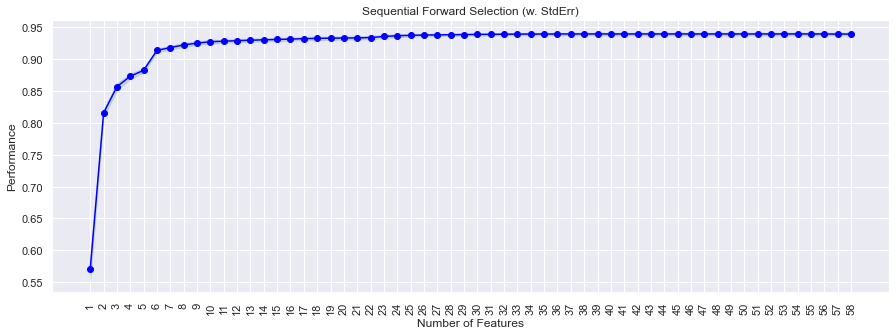

<IPython.core.display.Javascript object>

In [115]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

### Observation

* as we can see we get better result when using close to 28 feaures, Beyond 28 result is flat.

### Lets build a model with top 28 features and see how results looks

In [116]:
reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg, k_features=28, forward=True, floating=False, scoring="r2", n_jobs=-1, cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train_5, y_train_5)

<IPython.core.display.Javascript object>

In [117]:
# let us select the features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 14, 17, 21, 25, 27, 37, 38, 40, 42, 43, 44, 45, 50, 52, 53, 55, 56, 57]


<IPython.core.display.Javascript object>

### Columns used for this Model

In [118]:
# let us look at the names of the important features
x_train_5.columns[feat_cols]

Index(['Mileage', 'Engine', 'Power', 'Seats', 'Age_Of_Car', 'New_Price_log',
       'Kilometers_Driven_log', 'Location_Bangalore', 'Location_Coimbatore',
       'Location_Hyderabad', 'Location_Kolkata', 'Fuel_Type_Diesel',
       'Transmission_Manual', 'Make_Audi', 'Make_Bmw', 'Make_Jaguar',
       'Make_Jeep', 'Make_Land', 'Make_Maruti', 'Make_Mercedes-Benz',
       'Make_Mini', 'Make_Mitsubishi', 'Make_Skoda', 'Make_Tata',
       'Make_Toyota', 'Make_Volvo', 'Price_Type_MID-SCALE',
       'Price_Type_LUXURY'],
      dtype='object')

<IPython.core.display.Javascript object>

In [119]:
x_train_final = x_train_5[x_train_5.columns[feat_cols]]
# Creating new x_test with the same variables that we selected for x_train
x_test_final = x_test_5[x_train_final.columns]

<IPython.core.display.Javascript object>

In [120]:
# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_final, y_train_5)



LinearRegression()

<IPython.core.display.Javascript object>

In [121]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(
    lin_reg_model2, x_train_final, y_train_5, "Top 28 Features", "Train"
)
lin_reg_model_train_perf

Training Performance



,Model,Run Type,Total Features,Size,score %,R-squared,Adj. R-squared,RMSE,MAE,MSE,SST,SSE
0,Top 28 Features,Train,28,4913,93.967,0.940,0.939,0.207,0.159,0.043,3500.187,211.176


<IPython.core.display.Javascript object>

In [122]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(
    lin_reg_model2, x_test_final, y_test_5, "Top 28 Features", "Test"
)
lin_reg_model_test_perf

Test Performance



,Model,Run Type,Total Features,Size,score %,R-squared,Adj. R-squared,RMSE,MAE,MSE,SST,SSE
0,Top 28 Features,Test,28,2106,93.562,0.936,0.935,0.218,0.161,0.048,1558.031,100.304


<IPython.core.display.Javascript object>

### Observation

* results close to 93.5%, still not good at 94% we got on model 2.



# Model performance evaluation

### Evaluating all 5 models on different performance metrics



In [123]:
perf_training_compare = pd.concat(
    [
        perf_training_1_result,
        perf_training_2_result,
        perf_training_3_result,
        perf_training_4_result,
        lin_reg_model_train_perf,
        lin_reg_model_test_perf,
    ]
)
perf_training_compare

,Model,Run Type,Total Features,Size,score %,R-squared,Adj. R-squared,RMSE,MAE,MSE,SST,SSE
0,With all Features,Training,58,4913,94.138,0.941,0.941,0.204,0.157,0.042,3500.187,205.188
0,With all Features,Test,58,2106,93.711,0.937,0.935,0.216,0.159,0.047,1558.031,97.983
0,With all Features with higly sale category,Training,58,4562,94.396,0.944,0.943,0.198,0.151,0.039,3195.380,179.084
0,With all Features with higly sale category,Test,58,1956,93.206,0.932,0.930,0.211,0.157,0.044,1279.445,86.921
0,"With Model 2 Featuresm, No Power, No New Price",Training,56,4562,93.668,0.937,0.936,0.211,0.162,0.044,3195.380,202.320
0,"With Model 2 Featuresm, No Power, No New Price",Test,56,1956,92.829,0.928,0.926,0.217,0.166,0.047,1279.445,91.754
0,With Highly Correlated Features,Training,55,4913,93.980,0.940,0.939,0.207,0.159,0.043,3500.187,210.698
0,With Highly Correlated Features,Test,55,2106,93.550,0.936,0.934,0.218,0.161,0.048,1558.031,100.489
0,Top 28 Features,Train,28,4913,93.967,0.940,0.939,0.207,0.159,0.043,3500.187,211.176
0,Top 28 Features,Test,28,2106,93.562,0.936,0.935,0.218,0.161,0.048,1558.031,100.304


<IPython.core.display.Javascript object>

# Model Performance 

#### Comparing all 5 models which has 93% and above accourance on both Training and test data, All models have almost similar error rate. 

### Model 2 wins high accurancy scores and less error score compared to all models

#### all models does well, But may be Model 5 given similar performance with very less feature might be easier for implementaion.

### Lets Visualize how Model 2 fit closer to real test data

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

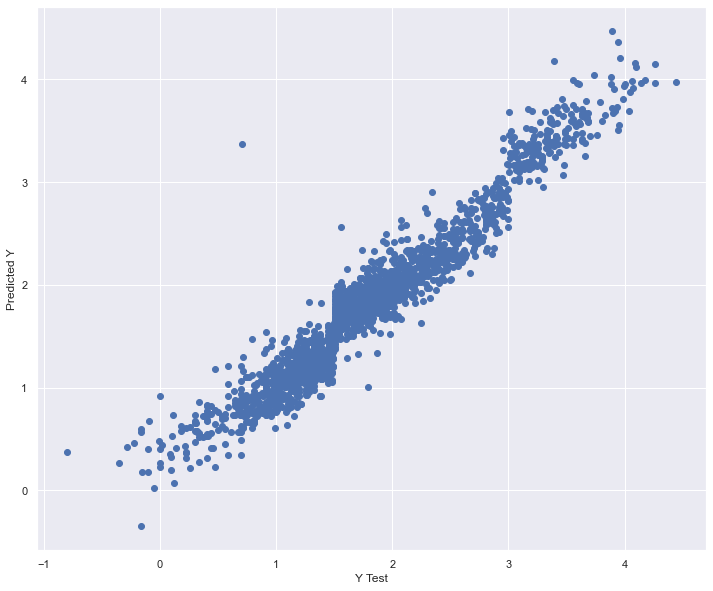

<IPython.core.display.Javascript object>

In [124]:
predictions = lm_2.predict( x_test_2)
plt.figure(figsize=(12,10))
plt.scatter(y_test_2,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


Text(0, 0.5, 'Predicted Y')

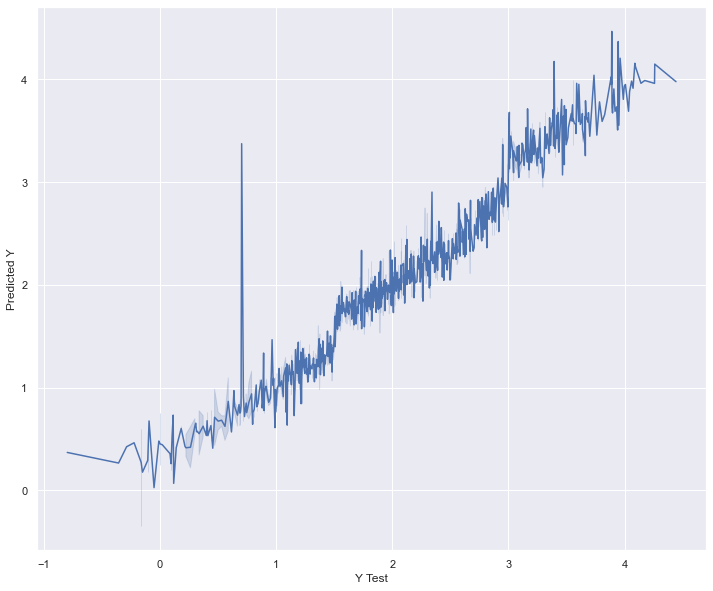

<IPython.core.display.Javascript object>

In [125]:
plt.figure(figsize=(12, 10))
sns.lineplot(x=y_test_2, y=predictions)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")

#### Model 2 shows good mapping of predict vs real values 

## Residuals

Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

<AxesSubplot:xlabel='Price_log', ylabel='Count'>

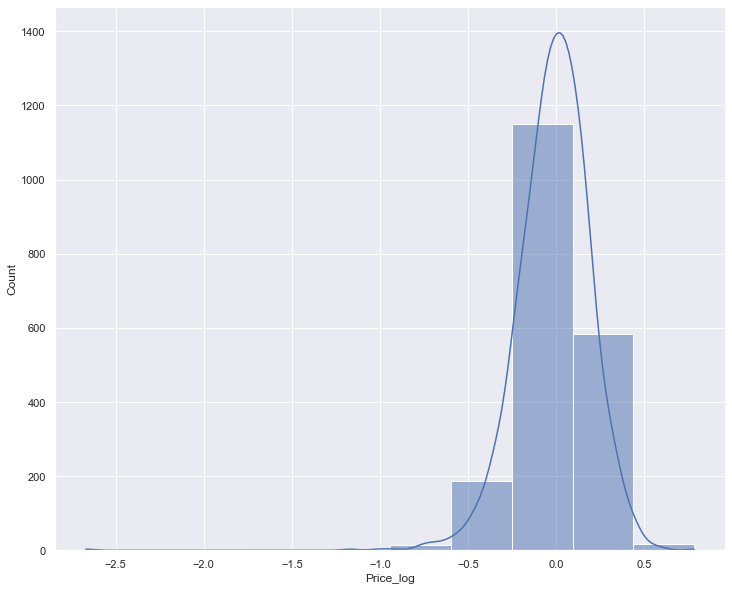

<IPython.core.display.Javascript object>

In [126]:
plt.figure(figsize=(12, 10))
sns.histplot((y_test_2 - predictions), bins=10, kde=True)

### we can see residuals distributed between -.5 to .5 

## Coefficients and Intercept of the best model

In [127]:
# let's check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lm_2.intercept_, lm_2.coef_),
    index=["Intercept"] + x_train_2.columns.tolist(),
    columns=["Coefficients"],
)

coef_df

,Coefficients
Intercept,1.968
Mileage,-0.009
Engine,0.000
Power,0.004
Seats,0.041
Age_Of_Car,-0.096
New_Price_log,0.026
Kilometers_Driven_log,-0.026
Location_Bangalore,0.064
Location_Chennai,0.011


<IPython.core.display.Javascript object>

#### key Features thats provides better price


In [128]:
## key Features to get high prices 

coef_df[coef_df > 0.3].dropna(axis=0)


,Coefficients
Intercept,1.968
Make_Audi,0.303
Make_Bmw,0.301
Make_Land,0.501
Make_Mercedes-Benz,0.314
Make_Mini,0.540
Price_Type_MID-SCALE,0.342
Price_Type_LUXURY,0.689


<IPython.core.display.Javascript object>

#### Features impacting car prices negatively 

In [129]:
## key Features to get high prices

coef_df[coef_df < -0.15].dropna(axis=0)

,Coefficients
Location_Kolkata,-0.150
Make_Datsun,-0.376
Make_Fiat,-0.294
Make_Ford,-0.168
Make_Isuzu,-0.333
Make_Mahindra,-0.165
Make_Renault,-0.176
Make_Tata,-0.486


<IPython.core.display.Javascript object>

### observations

* price type luxury drives the acual price, followed by mid_scale price type
* Mini, Land cars are pricy followed by BMW, Audi, Benz
* Otherwise location wise prices are not chaging much
* Diesel Fuel type gets high prices

### negative impacts 

* older car makes less money
* petrol cars are less appealing compared to disel 
* Some makes can neagively impact pricing 



## Formula to calculate price for any used car. 

**Automating the equation of the fit**

**to calculate price of any future used car**

In [130]:
# Let us write the equation of linear regression
print("Car Price Formula\n\n")
Equation = "Price = " + str(lm_2.intercept_)
print(Equation, end=" ")

for i in range(len(x_train_2.columns)):
    if i != len(x_train_2.columns) - 1:
        print(
            "\n+ (", lm_2.coef_[i], ")*(", x_train_2.columns[i], ")", end="  ",
        )
    else:
        print("\n+ (", lm_2.coef_[i], ")*(", x_train_2.columns[i], ")")

Car Price Formula


Price = 1.9675703833043392 
+ ( -0.0091536066246779 )*( Mileage )  
+ ( 8.800011588209187e-05 )*( Engine )  
+ ( 0.0044522015922807134 )*( Power )  
+ ( 0.04091854623113389 )*( Seats )  
+ ( -0.09553360817372422 )*( Age_Of_Car )  
+ ( 0.026060011968879804 )*( New_Price_log )  
+ ( -0.025530875779606402 )*( Kilometers_Driven_log )  
+ ( 0.0641071933485399 )*( Location_Bangalore )  
+ ( 0.011103849608016664 )*( Location_Chennai )  
+ ( 0.03381101500736915 )*( Location_Coimbatore )  
+ ( -0.050207434511672436 )*( Location_Delhi )  
+ ( 0.04457203122566265 )*( Location_Hyderabad )  
+ ( -0.047792866099684174 )*( Location_Jaipur )  
+ ( -0.06029914532680927 )*( Location_Kochi )  
+ ( -0.150174336066836 )*( Location_Kolkata )  
+ ( -0.04693452105273331 )*( Location_Mumbai )  
+ ( -0.04327649979405802 )*( Location_Pune )  
+ ( 0.08616622370325164 )*( Fuel_Type_Diesel )  
+ ( -5.221517662690189e-16 )*( Fuel_Type_Electric )  
+ ( -6.661338147750939e-16 )*( Fuel_Type_LPG )  


<IPython.core.display.Javascript object>

# Conclusion

### Best Linear Model For we have is  Model 2 
* model that has all standard fearues, with no high selling owner_types, fuel and seats performing well.
* has close to 94% accuracy score on both Training and Test data.
* very less error rate.

### Cars4U should focus on buying more 
* only Petrol & Diesel Vehicles with 5 or 7 seaters only First and Second hand owner type.
* buy more of mid scale and luxuy vehicles which are made by MINI, Land, Audi,BMW, Benz type which sells for high prices

### Cars4u should try not to buy

* older cars - cars older than 10 yrs 
* Non 5 or 7 seaters. Like 8, 10 or some time less than 5 
* Non Petrol or Diesel cars 
* Makers Datsun, Fiat, izusu, Tata are impact car price, should try not to buy these made cars